# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;">0. Introduction</p>
<div class="alert alert-info" role="alert">
    
<center> <img src="https://upload.wikimedia.org/wikipedia/commons/e/e3/Booking.com_logo2.png" style="width:368px;height:81px;"> 
    
  WHAT CASE DO WE DECIDE?   
   
Let’s say that we work as a data scientist at Booking. One of the problems of the company is the dishonest hotels that twist their ratings. One way to detect such hotels is to build a model that predicts the rating of the hotel. If the predictions of the model differ greatly from the actual result, then perhaps the hotel is being dishonest and worth checking out.
    
Let's look at the data that we have to work with.
    
    
<table >
   <tr>
    <th>Column</th>
    <th>Description</th>
  </tr>
  
   <tr>
    <td>hotel_address</td>
    <td>street, post code, city, country </td>
  </tr>
    
   <tr>
    <td>additional_number_of_scoring</td>
    <td>the number of hotel scores without review </td>
  </tr> 
    
  <tr>
    <td>review_date</td>
    <td>the day of review </td>
  </tr>
    
  <tr>
    <td>average_score</td>
    <td>the average rating of the hotel </td>
  </tr>
    
   <tr>
    <td>hotel_name</td>
    <td>the full name of hotel </td>
  </tr>
    
   <tr>
    <td>reviewer_nationality</td>
    <td>country from which the reviewer came </td>
  </tr>
    
   <tr>
    <td>negative_review </td>
    <td>text of negative review </td>
  </tr> 
   
   <tr>
    <td>review_total_negative_word_counts </td>
    <td>the total number words of negative review </td>
  </tr>  
    
   <tr>
    <td>total_number_of_reviews </td>
    <td>the total number of reviews that the hotel has </td>
  </tr>  
    
   <tr>
    <td>positive_review</td>
    <td>text of positive review </td>
  </tr> 
    
   <tr>
    <td>review_total_positive_word_counts</td>
    <td>the total number words of positive review </td>
  </tr> 
    
  <tr>
    <td>total_number_of_reviews_reviewer_has_given</td>
    <td>the total number of reviews reviewer has given </td>
  </tr> 
    
   <tr>
    <td>reviewer_score</td>
    <td>the number of reviewer score </td>
  </tr> 
    
   <tr>
    <td>tags</td>
    <td>tags that describe purpose of trip,type of room, count of nights of reviewer </td>
  </tr> 
    
   <tr>
    <td>days_since_review</td>
    <td>a difference in the number of days between review date and scrape date</td>
  </tr> 
    
   <tr>
    <td>lat</td>
    <td>latitude coordinate of hotel location </td>
  </tr> 
    
   <tr>
    <td>lng</td>
    <td>longitude coordinate of hotel location </td>
  </tr> 
    
</table>
    
</div>

# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;">1. Uploading and analysing of datasets</p> 
<h2>1.1. Import libraries</h2> 

In [1]:
!pip install pycountry-convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.5/223.5 kB 1.6 MB/s eta 0:00:00a 0:00:01


In [2]:
# importing some required packages
import os
import time
import re
import numpy as np
import pandas as pd

# importing some additional packages
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
from colorama import Fore, Back, Style
from collections import OrderedDict

# importing some packages for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
plotly.__version__
plotly.offline.init_notebook_mode (connected = True)

# importing some packages for dealing with geoscience data
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import pycountry_convert as pc

# importing some packages for dealing with text data
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon', quiet=True)
nltk.download('popular', quiet=True)
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

# importing some packages for encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
import category_encoders as ce 
target_encoder = ce.TargetEncoder(min_samples_leaf=20, smoothing=10) 

# importing some packages for machine learning 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import f_classif

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset/datasets/country_centroids.csv
/kaggle/input/dataset/datasets/country_centroids_complete.csv
/kaggle/input/dataset/datasets/UN_refugees.csv
/kaggle/input/dataset/datasets/country_finances.csv
/kaggle/input/dataset/datasets/Other/displacement_worldbank.csv
/kaggle/input/dataset/datasets/Other/country_regions.csv
/kaggle/input/dataset/datasets/Other/gwn_to_iso3c.csv
/kaggle/input/dataset/datasets/Other/population.csv
/kaggle/input/dataset/datasets/Other/total-affected-natural-disasters.csv
/kaggle/input/dataset/datasets/Other/GDP_worldbank.csv
/kaggle/input/dataset/datasets/Conflicts/ucdp-onesided-201.csv
/kaggle/input/dataset/datasets/Conflicts/ucdp-prio-acd-201.csv
/kaggle/input/dataset/datasets/Conflicts/ged201.csv
/kaggle/input/dataset/datasets/Resettlement/RSQDepartures_America.csv
/kaggle/input/dataset/datasets/Resettlement/RSQDepartures_Europe.csv
/kaggle/input/dataset/datasets/Resettlement/RSQDepartures_NorthAfrica.csv
/kaggle/input/dataset/datasets/Resettle

<h2 >1.2. Fixing</h2> 

In [3]:
# commiting RANDOM_SEED to make experiments repeatable!
RANDOM_SEED = 42

In [4]:
# commiting the package version to make the experiments repeatable:
!pip freeze > requirements.txt

<h2 >1.3. Import and visualization all datasets</h2> 

In [5]:
DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # dataset for training 
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # dataset for prediction
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # submission

In [6]:
# finding duplicates by using mask in train data
all_columns = list(df_train.columns)
mask_dupl = df_train.duplicated(subset=all_columns) 
data_duplicates = df_train[mask_dupl]
print(Style.BRIGHT)
print(f'Number of found duplicates: {data_duplicates.shape[0]}')
# deleting duplicates 
df_train.drop_duplicates(inplace=True,ignore_index=True)


Number of found duplicates: 307


In [7]:
df_train.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386496 entries, 0 to 386495
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386496 non-null  object 
 1   additional_number_of_scoring                386496 non-null  int64  
 2   review_date                                 386496 non-null  object 
 3   average_score                               386496 non-null  float64
 4   hotel_name                                  386496 non-null  object 
 5   reviewer_nationality                        386496 non-null  object 
 6   negative_review                             386496 non-null  object 
 7   review_total_negative_word_counts           386496 non-null  int64  
 8   total_number_of_reviews                     386496 non-null  int64  
 9   positive_review                             386496 non-null  object 
 

In [9]:
df_test.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [11]:
sample_submission.head(10)

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
5,10,302161
6,10,317079
7,1,13963
8,4,159785
9,10,195089


In [12]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


<h2>1.4. Joining train and test into one main dataset and visualization</h2> 

In [13]:
# combining the train and the test into one datacet for the correct treatment of features
df_train['sample'] = 1 # marking where we have the train
df_test['sample'] = 0 # marking where we have the test
# we have no reviewer_score value in the test, we should predict it, so far filling in zeros
df_test['reviewer_score'] = 0 

data = df_test.append(df_train, sort=False).reset_index(drop=True) # joining
data.tail(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
515428,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,9,21,"[' Business trip ', ' Solo traveler ', ' Singl...",543 day,51.520795,-0.131084,1,8.3
515429,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,6,28,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",74 days,51.515125,-0.160066,1,9.2
515430,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,20,2,"[' Leisure trip ', ' Couple ', ' Bunk Bed Room...",363 day,51.493109,-0.190208,1,8.8


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

In [15]:
data.nunique(dropna=True)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1472
lng                                             1472
sample                                             2
reviewer_score                                    38
dtype: int64

<h2>1.5. Cheking dataset for outliers, duplicates and gaps</h2> 

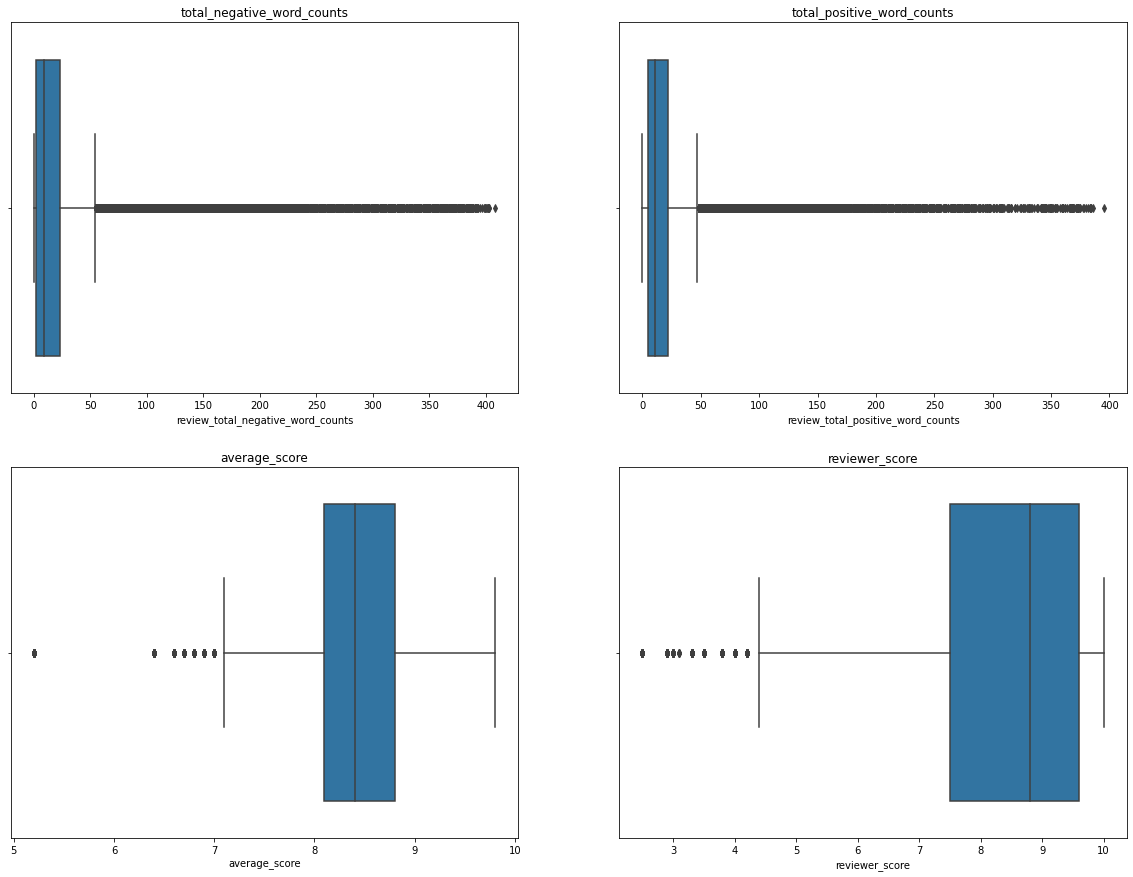

In [16]:
# creating box plots to visualize outliers of numeric features 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

boxplot = sns.boxplot(
    data=data, 
    x='review_total_negative_word_counts', 
    ax=axes[0,0]);
boxplot.set_title('total_negative_word_counts');

boxplot = sns.boxplot(
    data=data, 
    x='review_total_positive_word_counts', 
    ax=axes[0,1]);
boxplot.set_title('total_positive_word_counts');

boxplot = sns.boxplot(
    data=data, 
    x='average_score', 
    ax=axes[1,0]);
boxplot.set_title('average_score');

# creating mask that filters dataset by sample
# because zeros in reviewer score would prevent
mask = data['sample']==1

boxplot = sns.boxplot(
    data=data[mask], 
    x='reviewer_score',
    ax=axes[1,1]);
boxplot.set_title('reviewer_score');

<div class="alert alert-info" role="alert">
  Further, I decided to chek  "outliers". 
</div>

In [17]:
data[data['review_total_negative_word_counts']>405]

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
189545,Damrak 1 5 Amsterdam City Center 1012 LG Amste...,973,7/22/2016,8.0,Park Plaza Victoria Amsterdam,United Kingdom,The staff Had a bad experience even after boo...,408,4820,Slept well quiet rooms and enjoyed the view a...,17,8,"[' Business trip ', ' Solo traveler ', ' Doubl...",377 day,52.377278,4.897818,1,5.4


In [18]:
data[data['review_total_positive_word_counts']>390]

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
512807,Avenida Meridiana 151 Sant Mart 08026 Barcelon...,541,7/8/2017,7.9,Catalonia Atenas,Canada,Their customer service and crises management ...,14,6792,When we got there everything looked and seeme...,395,9,"[' Leisure trip ', ' Family with young childre...",26 days,41.411006,2.186601,1,5.4


In [19]:
data[data['average_score']<6].tail(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
482807,Viale Bligny 56 Milan City Center 20136 Milan ...,26,4/24/2017,5.2,Hotel Liberty,India,When you pay that much of an amount with an e...,67,465,Just the breakfast service,6,3,"[' Leisure trip ', ' Group ', ' Double Room ',...",101 day,45.450867,9.194866,1,2.9
490902,Viale Bligny 56 Milan City Center 20136 Milan ...,26,4/10/2017,5.2,Hotel Liberty,Turkey,rooms are dirty and useless this hotel is not...,16,465,near the duomo 2 stops by subway,9,13,"[' Business trip ', ' Group ', ' 2 rooms ', ' ...",115 day,45.450867,9.194866,1,4.2
505657,Viale Bligny 56 Milan City Center 20136 Milan ...,26,10/3/2015,5.2,Hotel Liberty,Russia,About 1 3 of lamps didn t work Shower was ver...,22,465,Not so far from the center of the city only s...,26,2,"[' Leisure trip ', ' Solo traveler ', ' Single...",670 day,45.450867,9.194866,1,7.1


In [20]:
data[data['reviewer_score']<=2.5].tail(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
514852,Piazza Lima 2 Central Station 20124 Milan Italy,298,8/17/2015,8.5,Best Western Plus Hotel Galles,United States of America,Due to uncontrollable flights changes in our ...,108,3550,No Positive,0,2,"[' Leisure trip ', ' Family with young childre...",717 day,45.480585,9.211733,1,2.5
514864,265 Rotherhithe Street Southwark London SE16 5...,995,11/11/2016,8.1,DoubleTree by Hilton London Docklands Riverside,United Kingdom,Be careful Deposits 50 nonrefundable They wil...,21,3826,No Positive,0,2,"[' Business trip ', ' Couple ', ' Queen Guest ...",265 day,51.504348,-0.033444,1,2.5
514939,163 Marsh Wall Docklands Tower Hamlets London ...,2682,10/29/2015,7.1,Britannia International Hotel Canary Wharf,France,No Negative,0,9086,Absolutely nothing The staff was unfriendly I...,65,3,"[' Business trip ', ' Solo traveler ', ' Stand...",644 day,51.501910,-0.023221,1,2.5


In [21]:
# saving in var number of total rows in main dataset
total_number_of_rows = data.shape[0]
print(Style.BRIGHT)
print(f'Total number of rows: {total_number_of_rows}')

# finding left duplicates 
mask_dupl = data.duplicated(subset=all_columns) 
data_duplicates = data[mask_dupl]
print(f'Number of found duplicates: {data_duplicates.shape[0]}')

# calculating nulls and creating series 
# just with nulls more than 0 
nulls_data = data.isnull().sum()
nulls = nulls_data[nulls_data > 0]
print(f'Features with nulls:\n{nulls}')


Total number of rows: 515431
Number of found duplicates: 29
Features with nulls:
lat    3268
lng    3268
dtype: int64


<h2>1.6. Visualization of correlation between numeric features </h2> 

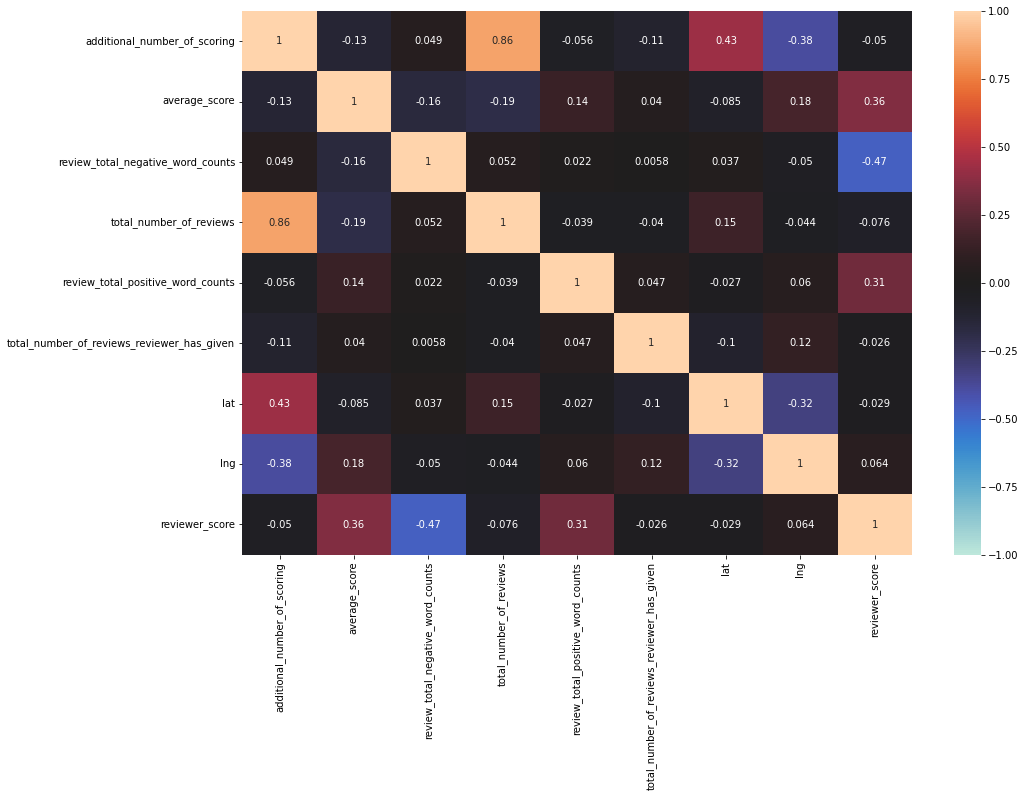

In [22]:
# creating correlation heatmap by using spearman method 
# and filtering dataset for zeros in reviwer scores
corr = data[mask].drop('sample', axis=1).corr(method = 'spearman')
plt.rcParams['figure.figsize'] = (15,10)
heatmap_corr = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0)

# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;"> 2. Feature engineering and analysing</p> 
# <p style="border:1px solid DodgerBlue" >2.1. Numerical columns  </p>
<div class="alert alert-info" role="alert">
<li>additional_number_of_scoring </li>   
<li>total_number_of_reviews   </li> 
<li>total_number_of_reviews_reviewer_has_given  </li> 
<li>review_total_negative_word_counts </li>  
<li>review_total_positive_word_counts </li>  
<li>days_since_review </li>  
</div>

In [23]:
# creating small dataset  in the context of one hotel
bloomsbury_hotel = data[data['hotel_name']=="Bloomsbury Palace Hotel"][:3]
# showing this dataset in the context of just numerical columns
bloomsbury_hotel[['additional_number_of_scoring', 
                  'total_number_of_reviews', 
                  'total_number_of_reviews_reviewer_has_given',
                  'review_total_negative_word_counts',  
                  'review_total_positive_word_counts', 
                  'days_since_review']]

,additional_number_of_scoring,total_number_of_reviews,total_number_of_reviews_reviewer_has_given,review_total_negative_word_counts,review_total_positive_word_counts,days_since_review
341,457,2751,4,59,38,262 day
947,457,2751,1,25,2,609 day
1319,457,2751,3,36,0,16 days


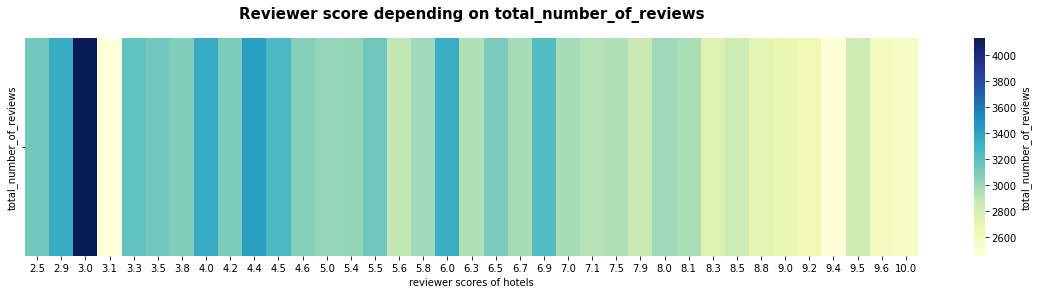

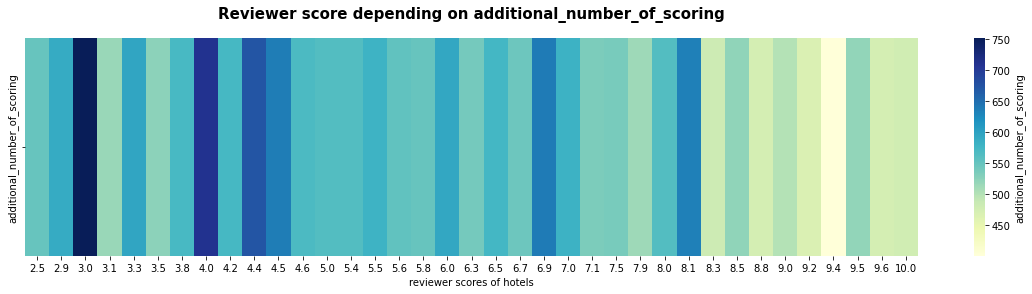

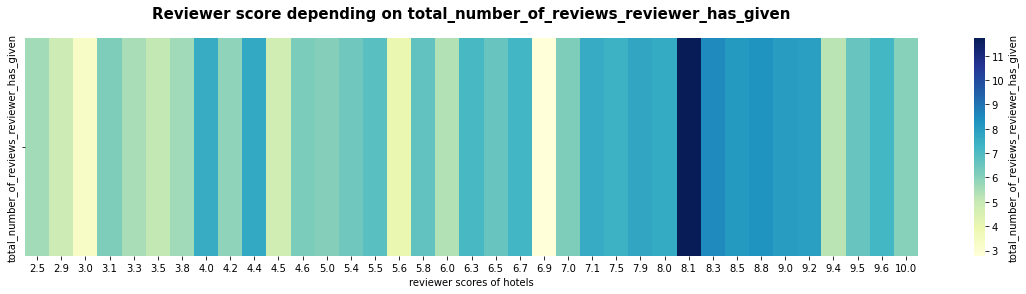

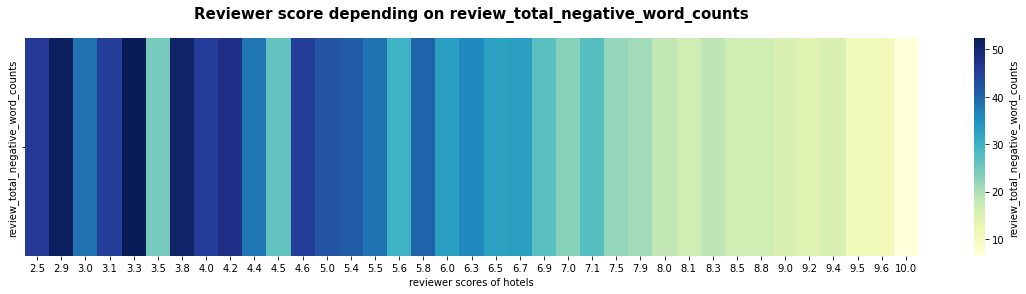

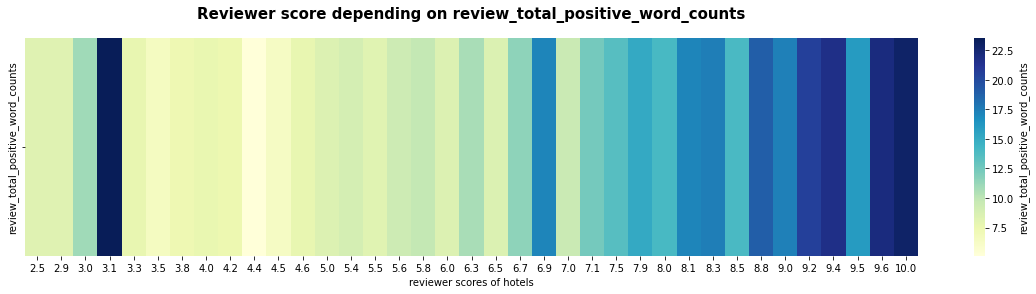

In [24]:
# creating function  to make this columns easier to visualize
def creating_heatmap(values):
    """This function create heatmap of main dataset.
    Args:
        name of column (str)
    Returns:
        heatmap graph
    """
    
    pivot_table = data[data['sample']==1].pivot_table(
    values=values, columns='reviewer_score')
    pivot_table.columns = pivot_table.columns.astype('string')
    fig, ax = plt.subplots(figsize=(20,4))    
    heatmap = sns.heatmap(data=pivot_table, cmap='YlGnBu', 
                          cbar_kws={'label': values})
    heatmap.set_title('Reviewer score depending on ' + values,
                      fontsize=15, fontweight='bold', pad=20);
    heatmap.set_xlabel('reviewer scores of hotels');
    
    return heatmap


heatmap_total = creating_heatmap('total_number_of_reviews')
heatmap_additional = creating_heatmap('additional_number_of_scoring')
heatmap_given = creating_heatmap('total_number_of_reviews_reviewer_has_given')
heatmap_negative = creating_heatmap('review_total_negative_word_counts')
heatmap_positive = creating_heatmap('review_total_positive_word_counts')

<div class="alert alert-info" role="alert">
 I decided to check "outliers" and if they contain not large number of rows, I will delete them.
</div>

In [25]:
# cheking number of outliers
print(data[data["reviewer_score"]==3.1].shape[0])
print(data[data["reviewer_score"]==6.9].shape[0])
print(data[data["reviewer_score"]==3.5].shape[0])
print(data[data["reviewer_score"]==3.0].shape[0])
print(data[data["reviewer_score"]==4.4].shape[0]) 
print(data[data["reviewer_score"]==4.5].shape[0]) 
print(data[data["reviewer_score"]==8.1].shape[0]) 

6
23
61
25
9
97
28


In [26]:
# deleting this outliers
data = data[data["reviewer_score"]!=3.1]
data = data[data["reviewer_score"]!=6.9]
data = data[data["reviewer_score"]!=3.5]
data = data[data["reviewer_score"]!=3.0]
data = data[data["reviewer_score"]!=4.4]
data = data[data["reviewer_score"]!=4.5]
data = data[data["reviewer_score"]!=8.1]

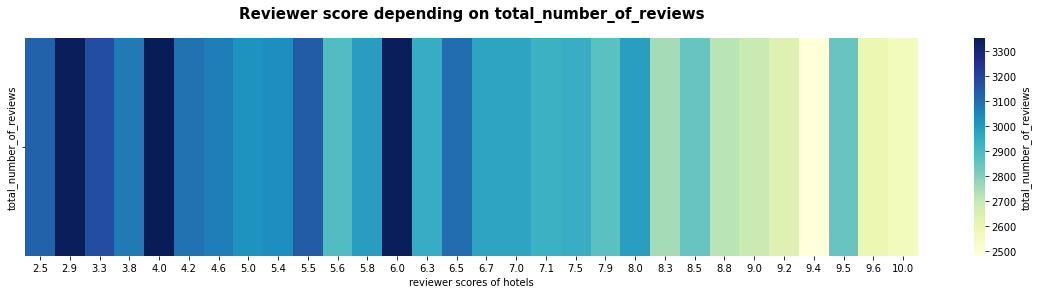

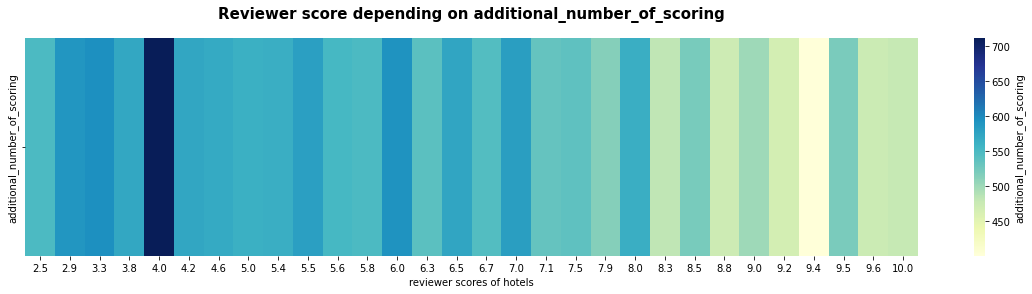

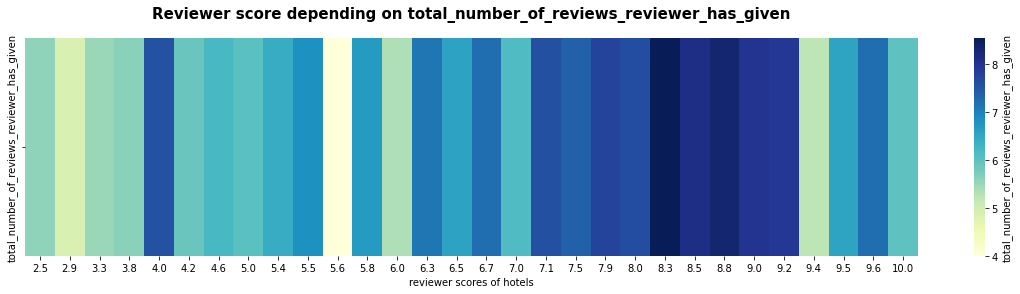

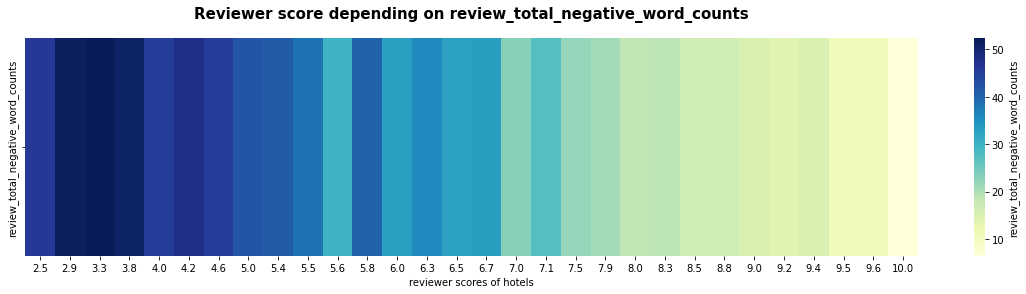

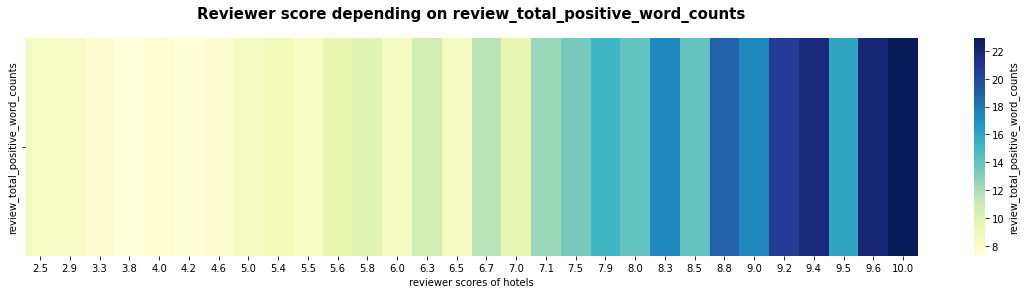

In [27]:
# after deleting check again
heatmap_total = creating_heatmap('total_number_of_reviews')
heatmap_additional = creating_heatmap('additional_number_of_scoring')
heatmap_given = creating_heatmap('total_number_of_reviews_reviewer_has_given')
heatmap_negative = creating_heatmap('review_total_negative_word_counts')
heatmap_positive = creating_heatmap('review_total_positive_word_counts')

In [28]:
# cheking number of outliers
print(data[data["reviewer_score"]==4.0].shape[0])
print(data[data["reviewer_score"]==5.6].shape[0])
print(data[data["reviewer_score"]==6.0].shape[0])
print(data[data["reviewer_score"]==6.5].shape[0]) 
print(data[data["reviewer_score"]==7.0].shape[0])
print(data[data["reviewer_score"]==9.4].shape[0])
print(data[data["reviewer_score"]==8.0].shape[0])
print(data[data["reviewer_score"]==8.5].shape[0])
print(data[data["reviewer_score"]==5.5].shape[0])
print(data[data["reviewer_score"]==9.5].shape[0])
print(data[data["reviewer_score"]==9.0].shape[0])

66
13
184
274
292
47
388
379
161
523
483


In [29]:
# deleting this outliers
data = data[data["reviewer_score"]!=4.0]
data = data[data["reviewer_score"]!=5.6]
data = data[data["reviewer_score"]!=6.0]
data = data[data["reviewer_score"]!=6.5]
data = data[data["reviewer_score"]!=7.0]
data = data[data["reviewer_score"]!=9.4]
data = data[data["reviewer_score"]!=8.0]
data = data[data["reviewer_score"]!=8.5]
data = data[data["reviewer_score"]!=5.5]
data = data[data["reviewer_score"]!=9.5]
data = data[data["reviewer_score"]!=9.0]

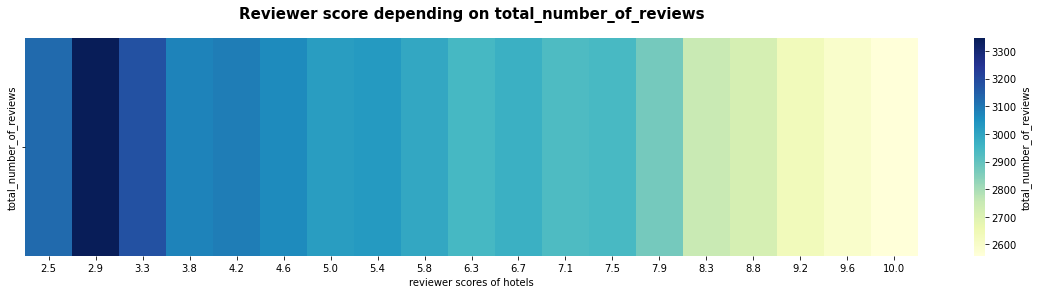

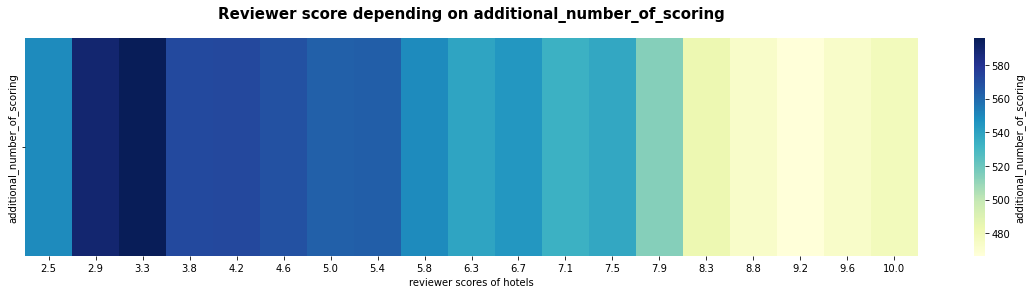

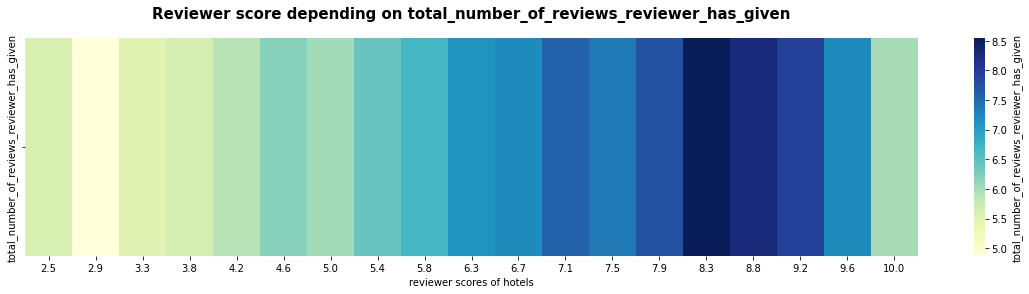

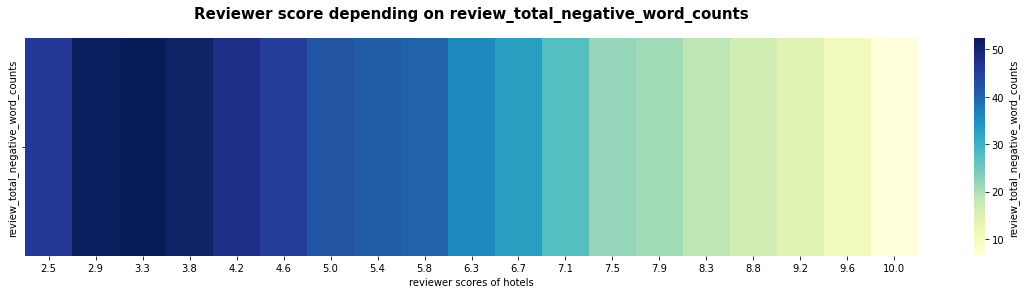

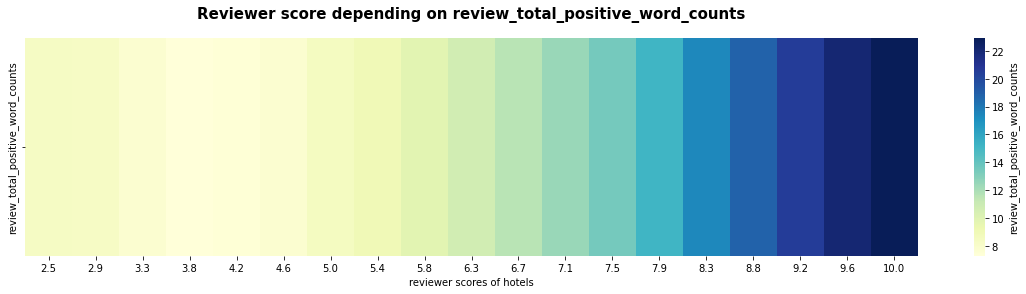

In [30]:
# after deleting check again
heatmap_total = creating_heatmap('total_number_of_reviews')
heatmap_additional = creating_heatmap('additional_number_of_scoring')
heatmap_given = creating_heatmap('total_number_of_reviews_reviewer_has_given')
heatmap_negative = creating_heatmap('review_total_negative_word_counts')
heatmap_positive = creating_heatmap('review_total_positive_word_counts')

In [31]:
print(Style.BRIGHT + '\n')
print(f'Number of rows before cleaning {total_number_of_rows}')
print(f'Number of cleaned rows {total_number_of_rows - data.shape[0]}')
print(f'Number of rows after cleaning {data.shape[0]}')



Number of rows before cleaning 515431
Number of cleaned rows 3059
Number of rows after cleaning 512372


<div class="alert alert-success" role="alert">
  After cleaning we can see that this numerical columns have good correlation between scores and improved prediction.
</div>

In [32]:
# calculating percentage of negative words
data['per_neg_words'] = 100 * data['review_total_negative_word_counts'] / \
                             (data['review_total_negative_word_counts'] + \
                              data['review_total_positive_word_counts'])
data['per_neg_words'].fillna(0, inplace=True)

# calculating retio of review that reviewer has given 
# from total number of reviews in dataset
data['ratio_of_review'] = data['total_number_of_reviews_reviewer_has_given']\
                          / data['total_number_of_reviews']
data.head(1)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score,per_neg_words,ratio_of_review
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0.0,45.614035,0.00006


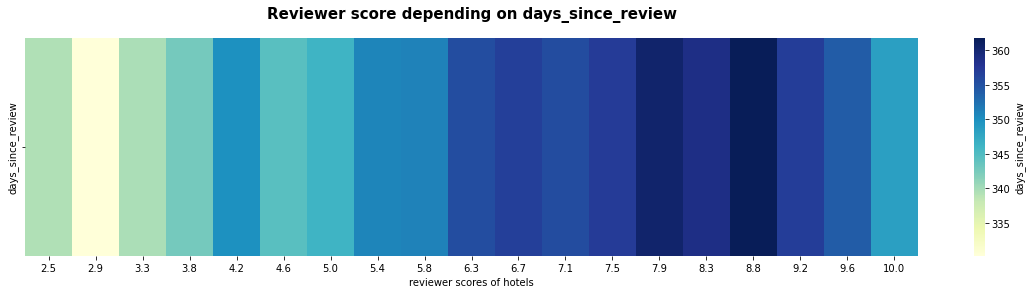

In [33]:
# extracting only numbers from 'days_since_review' column 
# by using regular expression and so changing type to int 
data['days_since_review'] = \
       data['days_since_review'].str.findall('\d+').str.get(0).astype(int)
# visualizing 
heatmap_days = creating_heatmap('days_since_review')

<div class="alert alert-success" role="alert">
  I am not sure that this column is important. May be I will delete it.
</div>

# <p style="border:1px solid DodgerBlue" >2.2. Temporal data </p>

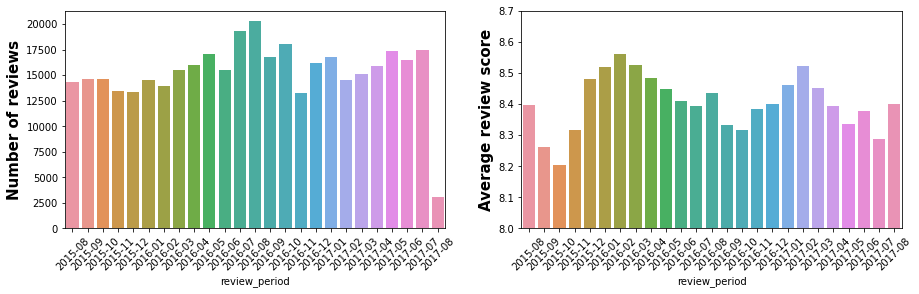

In [34]:
# converting 'review_date' column to datetime type 
data['review_date'] = pd.to_datetime(data['review_date'], yearfirst=True)

# creating new column with periods 
data['review_period'] = data['review_date'].dt.to_period("M")

# creating pivot table by month 
# for visualization average difference of reviewr score
period = data[data['sample']==1].pivot_table(
    values='reviewer_score',
    index='review_period',
    aggfunc=['mean', 'count']
)

# plotting bar graphs by using new created pivot table above
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(x=period.index, y=period[('count', 'reviewer_score')], ax=ax[0]);
ax[0].set_ylabel('Number of reviews', fontweight ='bold', fontsize = 15);
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x=period.index, y=period[('mean', 'reviewer_score')], ax=ax[1]);
ax[1].set_ylabel('Average review score', fontweight ='bold', fontsize = 15);
ax[1].tick_params(axis='x', rotation=45)
plt.ylim(8, 8.7)
plt.show()

<div class="alert alert-success" role="alert">
 Here, we can see that there are dependence between period and score. So I decided to encode it.
</div>

# <p style="border:1px solid DodgerBlue">2.3. Tags</p>

In [35]:
# creating set and list for calculating unique number
# and total number of tags by using loop
tags = set()
tags_list = list()
for index, value in data['tags'].items():
        pre_tags = value
        pre_tags = pre_tags.replace('[', '').replace(']', '')
        pre_tags = pre_tags.replace("'", '')
        pre_tags = pre_tags.split(",")
        for i in pre_tags:
            tags.add(i.strip())
            tags_list.append(i.strip())

print(Style.BRIGHT + "\nUnique number of tags in data:", len(tags))
print(Style.BRIGHT +"\nTotal number of tags in data:", len(tags_list))    


Unique number of tags in data: 2427

Total number of tags in data: 2341322


In [36]:
# creating series from all tags list for counting each tag frequency 
tags_series = pd.Series(
    data = tags_list,
    index = tags_list,
    name = 'tags_series'
)
print(Style.BRIGHT + "\nTop 50 frequent tags:", "\n")
print(tags_series.value_counts()[:50]) 


Top 50 frequent tags: 

Leisure trip                      415202
Submitted from a mobile device    305693
Couple                            250663
Stayed 1 night                    192370
Stayed 2 nights                   133070
Solo traveler                     107723
Stayed 3 nights                    95242
Business trip                      82298
Group                              65007
Family with young children         60650
Stayed 4 nights                    47493
Double Room                        35020
Standard Double Room               32039
Superior Double Room               31171
Family with older children         26192
Deluxe Double Room                 24657
Double or Twin Room                22265
Stayed 5 nights                    20700
Standard Double or Twin Room       17386
Classic Double Room                16773
Superior Double or Twin Room       13475
2 rooms                            12302
Stayed 6 nights                     9723
Standard Twin Room              

<div class="alert alert-info" role="alert" >
  We can analyse data by following parametrs: type of room, the number of nights, type of trip and type of guests. Also, here  we can add column for people who submitted from a mobile device.
</div>

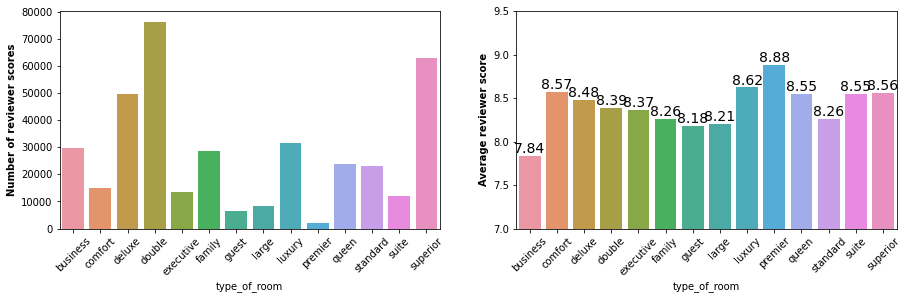

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,tags,days_since_review,lat,lng,sample,reviewer_score,per_neg_words,ratio_of_review,review_period,type_of_room
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,"[' Leisure trip ', ' Couple ', ' Double Room '...",13,45.533137,9.171102,0,0.0,45.614035,0.00006,2017-07,double


In [37]:
# creating function that divide tags to type of room 
def divide_type_room(tags):
    """This function by using loop searchs definite word in column of tags 
        and returns numbers depending on the availability of this word or not
        and so it divides to 14 type of room.

    Args:
        tags (series): the column of dataset

    Returns:
        str
    """
    premiers = ["Premier", "Royal", "President", "Presidential", 
                "Ordinary",  "Adjacent", "Exception"  ]
    luxuries = ['Luxury',  "Panoramic", 'Classic', "Loft", "Montcalm", "Privilege", 
                "Special", "Camper", "Sensation", "Classique", "Privilege", "Wonderful"]
    #suite
    deluxes  = ['Deluxe', "Premium"] 
    #executive
    #superior 
    larges   = ['Quadruple', 'Triple', 'Duplex', "Penthouse", "Townhouse",
                "Connecting", "Apartment", "Apartments"]
    queens   = ['Queen', 'King']
    #guest
    #family
    #business 
    comforts = ['Comfort','Large', 'Cosy',  'Cozy', 'Extra', 'Plus', 
                "Club", 'Art', 'View', 'Studio', "City", "Emotion"]
    #double
    #standard
    
    for premier in premiers:
        if premier in tags:
            return 'premier'
    for luxury in luxuries:
        if luxury in tags:
            return 'luxury'
    if 'Suite' in tags:
        return 'suite'
    for deluxe in deluxes:
        if deluxe in tags:
            return 'deluxe'
    if "Executive" in tags:
        return 'executive'
    if "Superior" in tags:
        return 'superior'
    for large in larges:
        if large in tags:
            return 'large'
    for queen in queens:
        if queen in tags:
            return 'queen'
    if "Guest" in tags:
        return 'guest'
    if "Family" in tags:
        return 'family'
    if "Business" in tags:
        return 'business'
    for comfort in comforts:
        if comfort in tags:
            return 'comfort'
    if 'Double' in tags:
            return 'double'
    else:
        return 'standard'

# creating new column of type room by applying function
data["type_of_room"] = data["tags"].apply(divide_type_room)

# plotting bar graphs of the relationship reviwer score and type of room 
rooms= pd.pivot_table(
    data=data[data['sample']==1],
    index='type_of_room', 
    values='reviewer_score', 
    aggfunc=['count', 'mean'])


fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(x=rooms.index, y=rooms[('count', 'reviewer_score')], ax=ax[0]);
ax[0].set_ylabel('Number of reviewer scores', fontweight ='bold', fontsize = 10)
ax[0].tick_params(axis='x', rotation=45)

bar_rooms = sns.barplot(x=rooms.index, y=rooms[('mean', 'reviewer_score')], ax=ax[1]);
ax[1].set_ylabel('Average reviewer score', fontweight ='bold', fontsize = 10)
ax[1].tick_params(axis='x', rotation=45)
plt.ylim(7, 9.5);

for p in bar_rooms.patches:
    bar_rooms.annotate(
    '{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
    ha='center', va='bottom', fontsize=14)
    
plt.show()
data.head(1)

In [38]:
ordered_types = rooms[('mean', 'reviewer_score')].nsmallest(14)
ordered_types

type_of_room
business     7.840326
guest        8.179579
large        8.207468
standard     8.261968
family       8.264989
executive    8.369388
double       8.387345
deluxe       8.476584
suite        8.546693
queen        8.549698
superior     8.556747
comfort      8.566772
luxury       8.622493
premier      8.881424
Name: (mean, reviewer_score), dtype: float64

<div class="alert alert-success" role="alert">
 I had a guess that the higher the status of the room, the higher the score. But, how we can see, this is not entirely true. So I decided to sort out them from small to large and just after to encode like ordinal data.
</div>

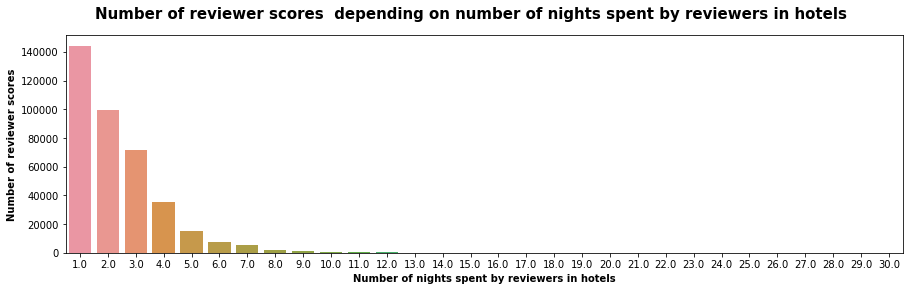

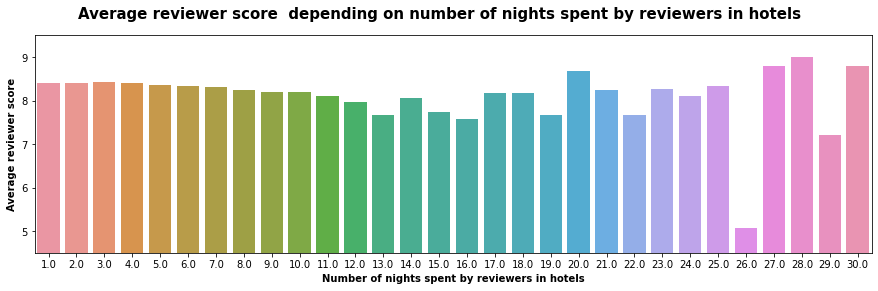

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,days_since_review,lat,lng,sample,reviewer_score,per_neg_words,ratio_of_review,review_period,type_of_room,count_nights
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,13,45.533137,9.171102,0,0.0,45.614035,0.00006,2017-07,double,2.0


In [39]:
# creating function that extract number of nights from tags
def extract_number_nights(tags):
    """This function by using regular expression searchs number of nights
    and returns object with number and then by using loop returns just number
    Args:
        tags (series): the column of dataset
    Returns:
        numbers (int)
    """ 
    express = re.findall(r'Stayed\s([0-9]+)\snight', tags)
    for elem, num in enumerate(express):
        return np.int8(num)

# addting new column with number of nights by applying function
data['count_nights'] = data['tags'].apply(extract_number_nights)
# filling missing data by mode
mode_night = data['count_nights'].mode()[0]
data['count_nights'] = data['count_nights'].fillna(mode_night)

# plotting bar graphs of the relationship reviwer score and number of nights
pivot_nights = pd.pivot_table(
    data=data[data['sample']==1],
    index='count_nights', 
    values='reviewer_score', 
    aggfunc=['count', 'mean']
)

fig, ax = plt.subplots(figsize=(15, 4))
plt.suptitle('Number of reviewer scores  depending on number of nights spent by reviewers in hotels', 
             fontweight ='bold', size=15)
sns.barplot(x=pivot_nights.index, y=pivot_nights[('count', 'reviewer_score')])
plt.xlabel('Number of nights spent by reviewers in hotels', 
           fontweight ='bold', fontsize = 10)
plt.ylabel('Number of reviewer scores', fontweight ='bold', fontsize = 10)

fig1, ax1 = plt.subplots(figsize=(15, 4))
plt.suptitle('Average reviewer score  depending on number of nights spent by reviewers in hotels', 
             fontweight ='bold', size=15)
sns.barplot(x=pivot_nights.index, y=pivot_nights[('mean', 'reviewer_score')])
plt.xlabel('Number of nights spent by reviewers in hotels', 
           fontweight ='bold', fontsize = 10)
plt.ylabel('Average reviewer score', fontweight ='bold', fontsize = 10)
plt.ylim(4.5, 9.5)
plt.show()
data.head(1)

<div class="alert alert-success" role="alert">
I wasn't sure that this created column is important. But prediction a little bit improved, so I decided to left it. 
</div>

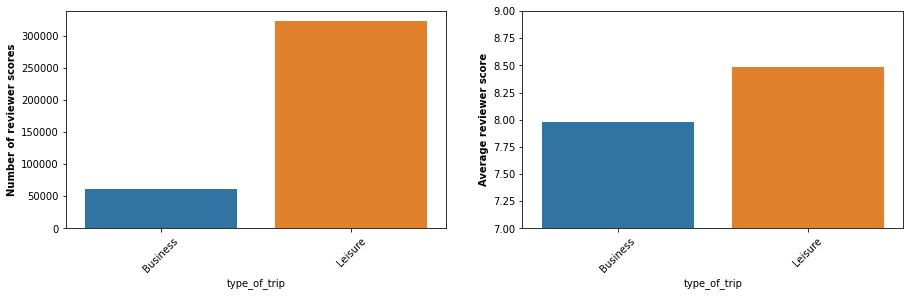

In [40]:
# creating function that extract type of trip from tags through regulars
def divide_type_trip(tags):
    """This function by using regular expression searchs type of trip
    and returns object with word and then by using loop returns just word
    Args:
        tags (series): the column of dataset
    Returns:
        word (str)
    """ 
    express = re.findall(r'([a-zA-Z]*)\strip', tags)
    for elem, word in enumerate(express):
        return word

# addting new column with name of trip by applying function
data['type_of_trip'] = data['tags'].apply(divide_type_trip)
# for filling gaps we create mode 
mode_type = data['type_of_trip'].mode()[0]
data['type_of_trip'] = data['type_of_trip'].fillna(mode_type)

# plotting bar graphs of the relationship reviwer score and type of trip
types = pd.pivot_table(
    data=data[data['sample']==1],
    index='type_of_trip', 
    values='reviewer_score', 
    aggfunc=['count', 'mean']
)

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(x=types.index, y=types[('count', 'reviewer_score')], ax=ax[0]);
ax[0].set_ylabel('Number of reviewer scores', fontweight='bold', fontsize=10)
ax[0].set_xticklabels(["Business", "Leisure"], fontsize = 10, rotation = 45)

sns.barplot(x=types.index, y=types[('mean', 'reviewer_score')], ax=ax[1]);
ax[1].set_ylabel('Average reviewer score', fontweight='bold', fontsize=10)
ax[1].set_xticklabels(["Business", "Leisure"], fontsize = 10, rotation = 45)
plt.ylim(7, 9);
plt.show()

<div class="alert alert-success" role="alert">
Like in type of room, business trip shows lower score, we can guess that maybe people who come for business more picky or hotels that provide business rooms have a low level of service, because guests with leisure trip aim also stayed in them. So I will encode it too. 
</div>

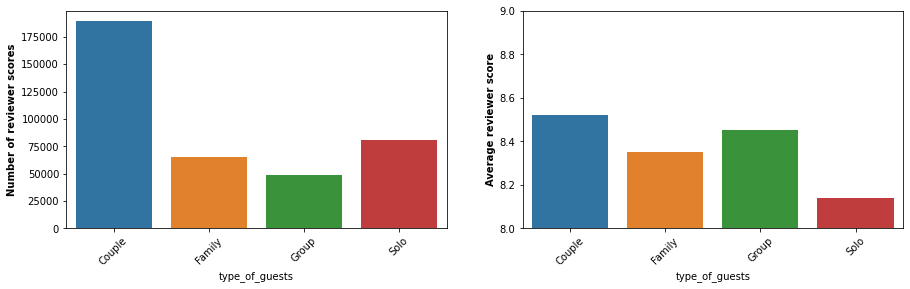

In [41]:
# creating function that extract type of guests from tags through regulars
def divide_guest_type(tags):
    """This function by using regular expression searchs type of guests
    and returns object with word and then by using loop returns just word
    Args:
        tags (series): the column of dataset
    Returns:
        word (str)
    """ 
    express = re.findall(r'Couple|Group|Family|Solo', tags)
    for elem, word in enumerate(express):
        return word

# addting new column with type of guests by applying function    
data['type_of_guests'] = data['tags'].apply(divide_guest_type)
# for filling gaps we create mode 
mode_guest = data['type_of_guests'].mode()[0]
data['type_of_guests'] = data['type_of_guests'].fillna(mode_guest)

# creating pivot table by guests
guests = pd.pivot_table(
    data=data[data['sample']==1],
    index='type_of_guests', 
    values='reviewer_score', 
    aggfunc=['count', 'mean'])

xticklabels_guest = ["Couple", "Family", "Group", "Solo"]
# plotting bar graphs of the relationship reviwer score and type of guests
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(x=guests.index, y=guests[('count', 'reviewer_score')], ax=ax[0]);
ax[0].set_xticklabels(xticklabels_guest, fontsize = 10, rotation = 45)
ax[0].set_ylabel('Number of reviewer scores', fontweight='bold', fontsize=10)

sns.barplot(x=guests.index, y=guests[('mean', 'reviewer_score')], ax=ax[1]);
ax[1].set_ylabel('Average reviewer score', fontweight='bold', fontsize=10)
ax[1].set_xticklabels(xticklabels_guest, fontsize = 10,  rotation = 45)
plt.ylim(8, 9);
plt.show()

<div class="alert alert-success" role="alert">
Here, we can guess that maybe people who come alone more picky than couple. There are a big diffirence between groupes, so I will encode it too. 
</div>

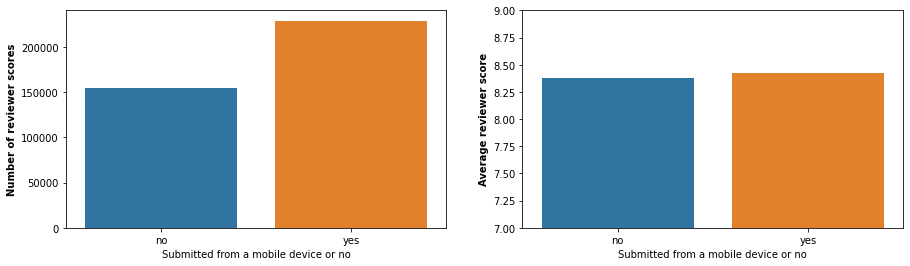

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,sample,reviewer_score,per_neg_words,ratio_of_review,review_period,type_of_room,count_nights,type_of_trip,type_of_guests,submitted_from_mobile
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,0,0.0,45.614035,0.00006,2017-07,double,2.0,Leisure,Couple,0


In [42]:
# creating new column deneding how reviewer was submitted
# if "Submitted from a mobile device" tag meets we return 1 else 0
data['submitted_from_mobile'] = data['tags'].apply( lambda x: 1
                                       if 'Submitted from a mobile device'
                                       in x else 0)

# plotting bar graphs of the relationship reviwer score and type of submitting
pivot= pd.pivot_table(
    data=data[data['sample']==1],
    index='submitted_from_mobile', 
    values='reviewer_score', 
    aggfunc=['count', 'mean'])

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(x=pivot.index, y=pivot[('count', 'reviewer_score')], ax=ax[0]);
ax[0].set_ylabel('Number of reviewer scores', fontweight ='bold', fontsize = 10)
ax[0].set_xlabel('Submitted from a mobile device or no',  fontsize = 10)
ax[0].set_xticklabels(["no", "yes"], fontsize = 10)

sns.barplot(x=pivot.index, y=pivot[('mean', 'reviewer_score')], ax=ax[1]);
ax[1].set_ylabel('Average reviewer score', fontweight ='bold', fontsize = 10)
ax[1].set_xlabel('Submitted from a mobile device or no', fontsize = 10)
ax[1].set_xticklabels(["no", "yes"], fontsize = 10)
plt.ylim(7, 9);
plt.show()
data.head(1)

<div class="alert alert-success" role="alert">
I wasn't sure that this created column is important. But after prediction a little bit improved, so I decided to left it. 
</div>

# <p style="border:1px solid DodgerBlue">2.4. Geographical locations of the hotels </p>

In [43]:
# some addresses from the column 'hotel_address'
# you can watch all addresses by running this code
# >>> list(data['hotel_address'].unique())
"""
 '81 103 Euston Street Camden London NW1 2EZ United Kingdom',
 'Pla a de Llevant s n Sant Mart 08019 Barcelona Spain',
 'Via Santa Sofia 10 Milan City Center 20122 Milan Italy'
""" 
# we should pay attention to London addresses 


# creating new column with country by cutting last word from addresses
data['hotel_country'] = data['hotel_address'].apply(
                        lambda x: "".join(x.split(' ')[-1:]))
# fixing the name of United Kingdom
data['hotel_country'] = data['hotel_country'].apply(
                        lambda x:'United Kingdom' if x == 'Kingdom' else x)
# creating unique list of all countries
countries =  list(data['hotel_country'].unique())
print(Style.BRIGHT + f"\nUnique list of countries: {','.join(countries)}.")


# creating new column with city by cutting the penultimate word from addresses
data['hotel_city'] = data['hotel_address'].apply(
                        lambda x: ','.join(x.split(' ')[-2:-1]))
# fixing the name of London
data['hotel_city'] = data['hotel_city'].apply(
                        lambda x: 'London' if x == 'United' else x)
# creating unique list of all countries
cities = list(data['hotel_city'].unique())
print(f"\nUnique list of cities: {','.join(cities)}.\n")

# by using indexes of nulls in rows to count unique number of hotels and 
# to create list of unique cities where coordinators have nulls 
index_null = data[data['lat'].isnull()].index  
len_hotels_null = len(data.loc[index_null]["hotel_name"].unique()) 
cities_null = list(data.loc[index_null]['hotel_city'].unique())
print(f"The number of unique hotels with zeros in coordinators: {len_hotels_null}.")
print(f"They are located in {', '.join(cities_null)} cities.\n")
data.head(1)


Unique list of countries: Italy,Netherlands,Spain,United Kingdom,France,Austria.

Unique list of cities: Milan,Amsterdam,Barcelona,London,Paris,Vienna.

The number of unique hotels with zeros in coordinators: 17.
They are located in Vienna, Paris, Barcelona cities.



,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,per_neg_words,ratio_of_review,review_period,type_of_room,count_nights,type_of_trip,type_of_guests,submitted_from_mobile,hotel_country,hotel_city
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,45.614035,0.00006,2017-07,double,2.0,Leisure,Couple,0,Italy,Milan


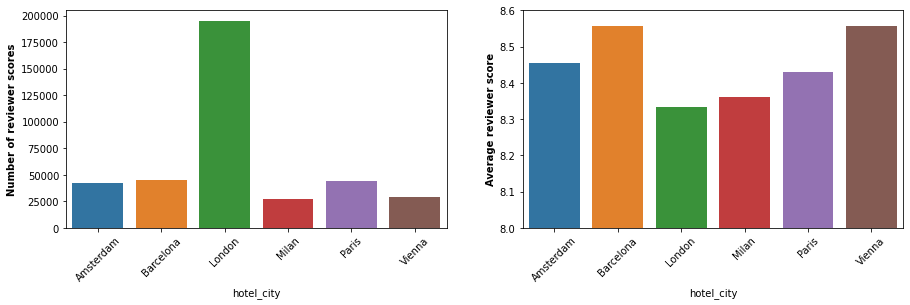

In [44]:
# plotting bar graphs of the relationship reviwer score and hotel city
city = pd.pivot_table(
    data=data[data['sample']==1],
    index='hotel_city', 
    values='reviewer_score', 
    aggfunc=['count', 'mean'])

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(x=city.index, y=city[('count', 'reviewer_score')], ax=ax[0]);
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylabel('Number of reviewer scores', fontweight='bold', fontsize=10)

sns.barplot(x=city.index, y=city[('mean', 'reviewer_score')], ax=ax[1]);
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylabel('Average reviewer score', fontweight='bold', fontsize=10)
plt.ylim(8, 8.6);
plt.show()

<div class="alert alert-success" role="alert">
  There are a big diffirence between cities, so I will encode it too. 
</div>

<div class="alert alert-info" role="alert">
  I've given next block for filling nulls in coordinators and creating column with distance from hotel to center of the city. For this purpose, I used geopy package, by this <a href="https://geopy.readthedocs.io/en/stable">this link</a> you can get familiar with its documentation.
</div>

In [45]:
# creating a new feature for a while by cutting last 3 word from addresses
# it will consist of zip code, city and country exept London addresses
# but it doesn't matter because they don't have nulls in coordinators
data['zip_city_country'] = data['hotel_address'].apply(
                            lambda x: ' '.join(x.split(' ')[-3:]))
# creating unique list of 'zip_city_country' with nulls 
zip_addresses = list(data.loc[index_null]['zip_city_country'].value_counts().index)
# creating 2 dictionaries to save there lat and lng of addresses with nulls
dict_lat = {}
dict_lng = {}
# by looping through above created list and by using geopy.geocoders lybrary package
# we are filling above created new dictionaries with coordinators 
for address in zip_addresses:
    loc = Nominatim(user_agent="GetLoc")
    getLoc = loc.geocode(address)
    dict_lat[address] = getLoc.latitude
    dict_lng[address] = getLoc.longitude
# then by creating mask with nulls and by mapping dictionary 
# we are filling nulls in coordinators 
mask_lat = data['lat'].astype('str').isin(['NaN','nan'])
data.loc[mask_lat, 'lat'] = data.loc[mask_lat, 'zip_city_country'].map(dict_lat)
mask_lng = data['lng'].astype('str').isin(['NaN','nan'])
data.loc[mask_lng, 'lng'] = data.loc[mask_lng, 'zip_city_country'].map(dict_lng)
# and in the end we are deleting for while created column "zip_city_country"
data.drop(["zip_city_country"], inplace=True, axis=1)


# creating unique dataset just with the next columns 
# to create dict in the future with distance from hotel to city 
unique_hotels = data[["hotel_name","lat", "lng", "hotel_city"]]
unique_hotels = unique_hotels.drop_duplicates().set_index('hotel_name')

# there also we are using geopy.geocoders lybrary package
# to create dict with center locations 
dict_center_locations = OrderedDict()
for city in cities:
    loc = Nominatim(user_agent="GetLoc")
    getLoc = loc.geocode(city)
    dict_center_locations[city] = str(getLoc.latitude) +\
                                    ", " + str(getLoc.longitude)
# then we are creating dataframe from this dict and after again dict
# because we need dict where value has list type (not str type)
center_locations = pd.DataFrame.from_dict(
                    dict_center_locations, 
                    orient='index', 
                    columns=['center_location'])
center_locations = center_locations.set_index(center_locations.index)
dict_center_loc = center_locations.T.to_dict('list', into=OrderedDict)

# then we are copying above created unique dataset for creating 
# same dict like dict_center_loc but with hotels coordinators 
hotel_locations = unique_hotels.copy()
hotel_locations[['lat', 'lng']] = hotel_locations[['lat', 'lng']]\
                                        .astype('string')
hotel_locations['hotel_location'] = hotel_locations['lat'] +\
                                        ", " + hotel_locations['lng']
hotel_locations.drop(["lat", "lng","hotel_city"], inplace=True, axis=1)
dict_hotel_loc = hotel_locations.set_index(hotel_locations.index)\
                                        .T.to_dict('list', into=OrderedDict)

# we have two dict: center location and hotel location 
# by mapping this dicts we are creating new columns in unique dataset
unique_hotels['hotel_location'] = unique_hotels.index.map(dict_hotel_loc)
unique_hotels['center_location'] = unique_hotels['hotel_city'].map(dict_center_loc)
# then we are preparing this dataset for creating nested dict that will contain of
# key is hotel name and value is  dict where key is name of location, 
# value is list with coordinators 
unique_hotels.drop(["lat", "lng","hotel_city"], inplace=True, axis=1)
dict_unique_loc = unique_hotels.set_index(unique_hotels.index)\
                                        .T.to_dict('dict', into=OrderedDict)

# from geopy.distance package we will use geodesic to calculate distance 
# first of all we are initializing empty dictionary to save there key like hotel name 
# and value like distance in miles 
dict_distance = OrderedDict()
for hotel, locations in dict_unique_loc.items():  
    for key, value in locations.items():
        if key == "hotel_location":
            hotel_location = value
        else:
            center_location = value
            distance = geodesic(center_location, hotel_location).miles
            dict_distance[hotel] = distance
# all this were done to create column in main dataset with distance 
data['distance_to_center_miles'] = data['hotel_name'].map(dict_distance)
print(Style.BRIGHT + "\nCheking the new feature:\n") 
data[['hotel_name', "distance_to_center_miles"]][:10]


Cheking the new feature:



,hotel_name,distance_to_center_miles
0,Hotel Da Vinci,4.845534
1,Urban Lodge Hotel,2.657200
2,Alexandra Barcelona A DoubleTree by Hilton,1.090383
3,Hotel Principe Di Savoia,1.131134
4,Hotel Esther a,0.259851
5,Holiday Inn London Bloomsbury,1.164339
6,Holiday Inn London Wembley,7.659528
7,Novotel London West,4.127988
8,Hotel Saint Petersbourg Opera,0.988329
9,St George Hotel,1.525684


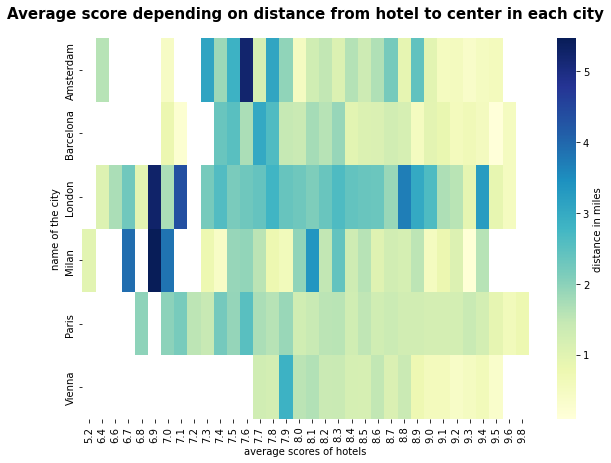

In [46]:
# cretaing pivot table with distance values for visualization 
# how average score depend on distance from hotel to center in each city
pivot_distance = data[data['sample']==1].pivot_table(
    values='distance_to_center_miles',
    columns='average_score',
    index='hotel_city')
pivot_distance.columns = pivot_distance.columns.astype('string')
fig, ax = plt.subplots(figsize=(10,7))    
heatmap = sns.heatmap(data=pivot_distance, cmap='YlGnBu', 
                      cbar_kws={'label': 'distance in miles'})
heatmap.set_title('Average score depending on distance from hotel to center in each city',
                  fontsize=15, fontweight='bold', pad=20);
heatmap.set_xlabel('average scores of hotels');
heatmap.set_ylabel('name of the city');

<div class="alert alert-success" role="alert">
  Here we see not a large tendency that the further the hotel the lower the rating of hotels.  
</div>

# <p style="border:1px solid DodgerBlue">2.5. Nationalities of the reviewers </p>

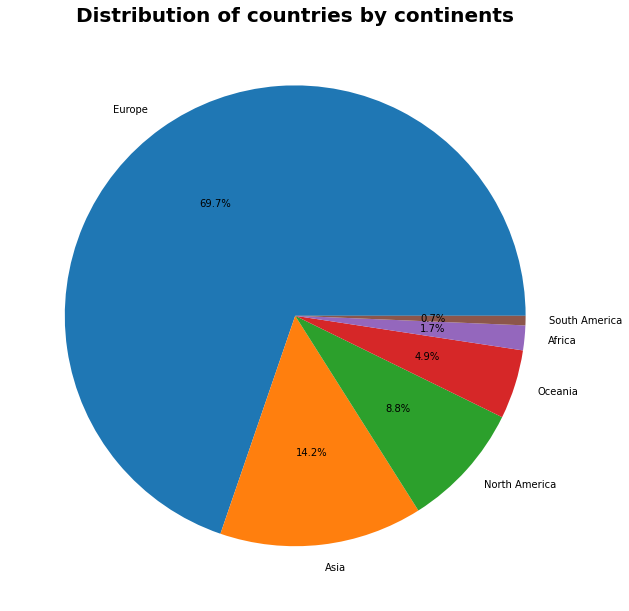

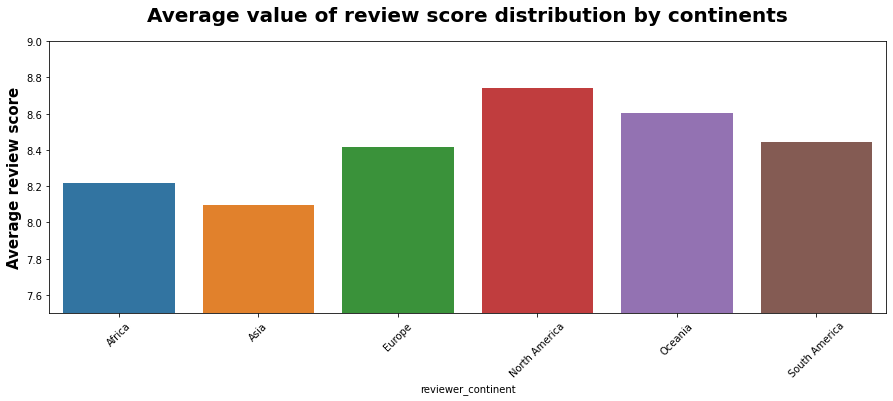

CPU times: user 4.52 s, sys: 546 ms, total: 5.07 s
Wall time: 4.62 s


In [47]:
%%time

# cutting gaps on both sides by using strip() in reviewer_nationality column
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: x.strip())
# filling gaps in rows by mode 
mode_nation = data['reviewer_nationality'].mode()[0]
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: mode_nation if x == "" else x)

# creating function that convert country to continent 
def country_to_continent(country_name):
    """This function by using "pycountry_convert" 
    package convert country to continent  
    Args:
        reviewer_nationality (str): the column of dataset
    Returns:
        continent (str)
    """ 
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    return continent_name


# after running "country_to_continent" function were identified some countries 
# that don't fit to converting for various reasons like unrecognized states 
# so they were changed to near replaced recognized states
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: "Ukraine" if x == "Crimea" else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: "Serbia" if x == "Kosovo" else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                            lambda x: 'Georgia' if x == 'Abkhazia Georgia' 
                            else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Curaçao' if x == 'Cura ao' else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'USA' if x == 'U S Virgin Islands'
                                else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'USA'
                                if x == 'United States Minor Outlying Islands' 
                                else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Palestine'
                                if x == 'Palestinian Territory' else x)
# creating list with small islands countries that replaced around Puerto Rico   
puerto_ricos = ['St Maarten','Saint Barts',
                'Bonaire St Eustatius and Saba','Turks Caicos Islands',
                "Antigua Barbuda", "Saint Vincent Grenadines"]
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Puerto Rico' if x in puerto_ricos 
                                else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Italy' if x == 'Vatican City' else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Madagascar' if x == 'Reunion' else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Falkland Islands' 
                                if x == 'Falkland Islands Malvinas'else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Falkland Islands' if x == 'Antarctica' 
                                else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Canada'if x == 'St Pierre and Miquelon' 
                                else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Australia' if x=='Cocos K I' else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Indonesia' if x=='East Timor' else x)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Svalbard' if x == 'Svalbard Jan Mayen'
                                else x)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
data['reviewer_nationality'] = data['reviewer_nationality'].apply(
                                lambda x: 'Central African Republic' 
                                if x == 'Central Africa Republic'else x) 

# just after these changes "country_to_continent" function
# was applied to 'reviewer_nationality' column
data['reviewer_continent'] = data['reviewer_nationality']\
                                        .apply(country_to_continent)

# creating pie cart to visualize how countries are distributed across continents
reviewer_continents = data['reviewer_continent'].value_counts()
fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    reviewer_continents,
    labels=reviewer_continents.index,
    autopct='%.1f%%'
)
axes.set_title('Distribution of countries by continents', 
               fontweight ='bold', fontsize = 20);

# plotting bar graph of the relationship reviwer score and reviewer_continent
pivot_continent = pd.pivot_table(
    data=data[mask],
    index='reviewer_continent', 
    values='reviewer_score', 
    aggfunc='mean'
)
fig, axes = plt.subplots(figsize=(15, 5))
sns.barplot(x=pivot_continent.index, y=pivot_continent['reviewer_score']);
axes.set_title('Average value of review score distribution by continents', 
              fontweight ='bold', fontsize = 20, pad=20);
axes.set_ylabel('Average review score', fontweight ='bold', fontsize = 15);
axes.tick_params(axis='x', rotation=45)
plt.ylim(7.5, 9)
plt.show()

<div class="alert alert-info" role="alert">
    How we can see, dividing the reviewer nationalities into continents didn't give big difference. So I dicided to divide them into sub_regions, for this purpose I will use dataset from kaggle. This dataset has columns: country_name, alpha-3 and sub-region and others that we do not need.   
    
Since country names may differ, it is more reliable to use alpha-3 codes, so by using "pycountry_convert" package I decided to create column alpha-3 codes from reviewer nationality column. 
</div>

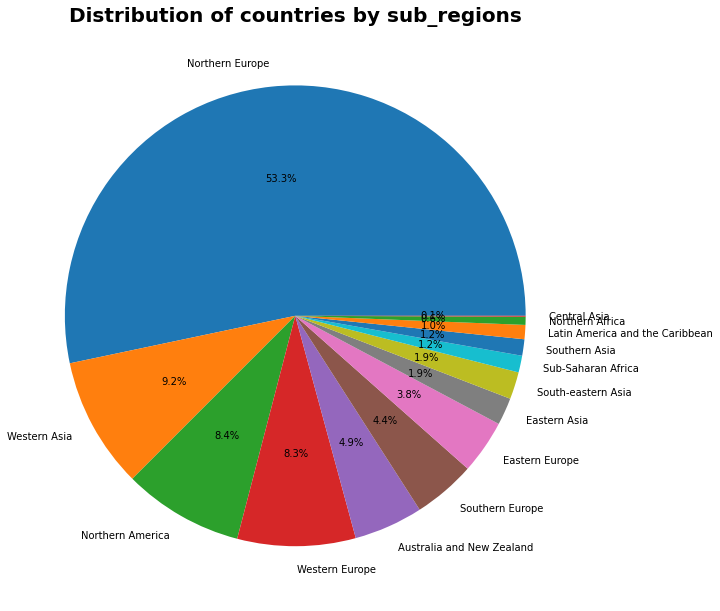

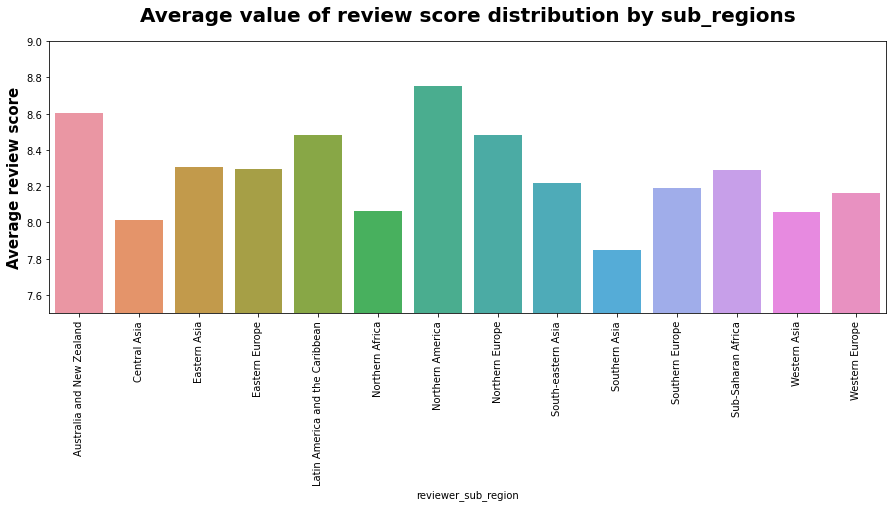

CPU times: user 2.22 s, sys: 504 ms, total: 2.72 s
Wall time: 2.25 s


In [48]:
%%time

# uploading df from kaggle dataset
regions = pd.read_csv('/kaggle/input/dataset/datasets/Other/country_regions.csv')
# rewriting this df leaving only two columns and replacing indexes 
regions = regions[["name", "sub-region"]].set_index(regions['alpha-3'])
# after getting rid of the unnecessary "name" column to create a dictionary
regions.drop(["name"], inplace=True, axis=1)
# creating dictionary for mapping purpose 
dict_regions = regions.set_index(regions.index).T.to_dict("list")
# creating a new feature for a while - "reviewer_country_alpha3"
data['reviewer_country_alpha3'] = data['reviewer_nationality'].apply(
                                lambda x: pc.country_name_to_country_alpha3(x))
# creating 'reviewer_sub_region' column by mapping above created dict
data['reviewer_sub_region'] = data['reviewer_country_alpha3'].map(dict_regions)
# in the end we are deleting for while created column "reviewer_country_alpha3"
data.drop(["reviewer_country_alpha3"], inplace=True, axis=1)
# creating function that convert "reviewer_country_alpha3" to str type
def convert_to_str(feature):
    """this func return str type word"""
    for elem, item in enumerate(feature):
        return item

# applying this function 
data['reviewer_sub_region'] = data['reviewer_sub_region'].apply(convert_to_str)
# 'Melanesia', 'Micronesia', 'Polynesia' regions contained small number 
# so I decided to join them with "Australia and New Zealand"  region
data['reviewer_sub_region'] = data['reviewer_sub_region'].apply(
                                lambda x: "Australia and New Zealand" 
                                if x in ('Melanesia', 'Micronesia', 'Polynesia') 
                                else x)

# creating pie cart to visualize distributing countries across sub regions
reviewer_sub_regions = data['reviewer_sub_region'].value_counts()
fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    reviewer_sub_regions,
    labels=reviewer_sub_regions.index,
    autopct='%.1f%%');
axes.set_title('Distribution of countries by sub_regions', 
               fontweight ='bold', fontsize = 20);

# plotting bar graph of the relationship reviwer score and reviewer_continent
pivot_regions = pd.pivot_table(
    data=data[mask],
    index='reviewer_sub_region', 
    values='reviewer_score', 
    aggfunc='mean'
)
fig, axes = plt.subplots(figsize=(15, 5))
sns.barplot(x=pivot_regions.index, y=pivot_regions['reviewer_score']);
axes.tick_params(axis='x', rotation=90)
axes.set_title('Average value of review score distribution by sub_regions', 
              fontweight ='bold', fontsize = 20, pad=20);
axes.set_ylabel('Average review score', fontweight ='bold', fontsize = 15);
plt.ylim(7.5, 9)
plt.show()

<div class="alert alert-success" role="alert">
    I didn't know about Target Encoder at the beginning so I tried to group countries. But it helped me to create choporleth map becuse while I was trying to convert them into continents I fixed a lot of name of countries. 
</div>

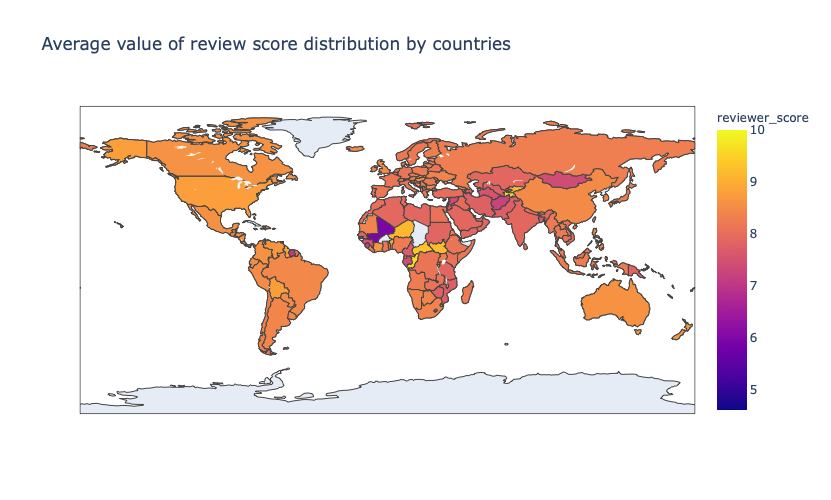

In [49]:
# creating pivot table for choropleth 
data_map = pd.pivot_table(
    data=data[mask],
    index='reviewer_nationality',
    values='reviewer_score', 
    aggfunc='mean'
).reset_index()
# plotting choropleth map where 
#reviewer score  affects the color
fig = px.choropleth(
    data_frame=data_map, 
    locations="reviewer_nationality", 
    locationmode = "country names", 
    color="reviewer_score", 
    width=800, 
    height=500, 
    color_continuous_scale=px.colors.sequential.Plasma,
    title = 'Average value of review score distribution by countries'    
)
fig.show()

<div class="alert alert-success" role="alert">
    I decided to encode "reviewer_nationality" column , because it gives better score than others.
</div>

# <p style="border:1px solid DodgerBlue">2.6. Texts of the reviews </p>

In [50]:
# short summary of review texts
data[["negative_review", "positive_review"]].tail(5)

,negative_review,positive_review
515426,No Negative,Tr s proche du metro Earl s court
515427,No Negative,The bed was so comfy I stayed with my boyfrie...
515428,room is really small but guess is normal in L...,great location simple check in out nice shower
515429,No Negative,Location and very comfy bed
515430,Patio outside could have been cleaned of alga...,Beds comfortable Pillows also good Homely fee...


<div class="alert alert-info" role="alert">
Sentiment Analysis Tools   

Sentiment analysis can help you determine the ratio of positive to negative engagements about a specific topic. You can analyze bodies of text, such as comments, tweets, and product reviews, to obtain insights from your audience.
    
<img src= "https://stackabuse.s3.amazonaws.com/media/sentiment-analysis-in-python-with-textblob-1.jpg" width="400">

Reviews are very important to get a clear picture of what the customers think and why they gave to hotel such rating. I reviewed three kind analysis tools of nlp to choose most suitable ones. 
</div>

* NLTK (Natural Language ToolKit) Sentiment Analysis is the process of categorizing numerous samples of linked text into various categories using algorithms. We may use these techniques to extract insights from linguistic data with NLTK’s sophisticated built-in machine learning operations. It classifies text and gives us four values in a dictionary:
    * negative: the negative sentiment in a sentence
    * neutral: the neutral sentiment in a sentence
    * positive: the positive sentiment in the sentence
    * compound: the aggregated sentiment.                
    
      
* TextBlob Sentiment Analysis. The approach that the TextBlob package applies to sentiment analysis differs in that it’s rule-based and therefore requires a pre-defined set of categorized words. These words can, for example, be uploaded from the NLTK database. Moreover, sentiments are defined based on semantic relations and the frequency of each word in an input sentence that allows getting a more precise output as a result.    
    TextBlob’s output for a polarity task is a float within the range [-1.0, 1.0] where -1.0 is a negative polarity and 1.0 is positive. This score can also be equal to 0, which stands for a neutral evaluation of a statement as it doesn’t contain any words from the training set.    
    Whereas, a subjectivity/objectivity identification task reports a float within the range [0.0, 1.0] where 0.0 is a very objective sentence and 1.0 is very subjective.  
    
* TextBlob's .sentiment + NaiveBayesAnalyzer. TextBlob's other option uses a NaiveBayesAnalyzer, which is a machine learning technique. When you use this option with TextBlob, the sentiment is coming from NLTK classifier trained on a movie reviews corpus.  
    It returns results as a namedtuple of the form: Sentiment(classification, p_pos, p_neg), here neutral position of the p_pos and p_neg values is 0.5.  
    
    <img src="https://dev-gang.ru/static/storage/260221293701977790295363160988809390228.jpg" width="600">
    
<div class="alert alert-info" role="alert">
However, before analyzing by this tools, we need to prepare text because words like 'No Negative', 'Nothing' can give don't right result, so I changed them to "" and then I did review how these tools work.
</div>

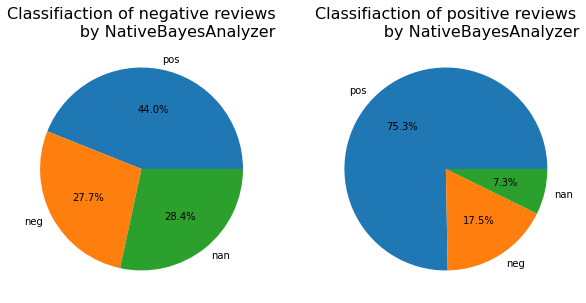

CPU times: user 5min 13s, sys: 886 ms, total: 5min 14s
Wall time: 5min 16s


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,type_of_trip,type_of_guests,submitted_from_mobile,hotel_country,hotel_city,distance_to_center_miles,reviewer_continent,reviewer_sub_region,clas_neg_review,clas_pos_review
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,Leisure,Couple,0,Italy,Milan,4.845534,Europe,Northern Europe,pos,pos


In [51]:
%%time

data['negative_review'] = data['negative_review'].apply(
                            lambda x: x.replace('No Negative', ''))
data['positive_review'] = data['positive_review'].apply(
                            lambda x: x.replace('No Positive', ''))
data['negative_review'] = data['negative_review'].apply(
                            lambda x: x.replace(' Nothing ', ''))
data['positive_review'] = data['positive_review'].apply(
                            lambda x: x.replace(' Nothing ', ''))
data['negative_review'] = data['negative_review'].apply(
                            lambda x: x.replace(' Nothing', ''))
data['positive_review'] = data['positive_review'].apply(
                            lambda x: x.replace(' Nothing', ''))
data['negative_review'] = data['negative_review'].apply(
                            lambda x: x.replace('Nothing', ''))

# TextBlob's .sentiment + NaiveBayesAnalyzer
# creating object of blobber with naive bayes analyzer from textblob sentiments
blobber = Blobber(analyzer=NaiveBayesAnalyzer())
# classification review by NaiveBayesAnalyzer to negative and positive 
data['clas_neg_review'] = data['negative_review'].apply(
                                lambda x: blobber(x).sentiment.classification)
data['clas_pos_review'] = data['positive_review'].apply(
                                lambda x: blobber(x).sentiment.classification)
# for visualization purpose I calculated pos and neg in negative review
# considering that there we have "" and analyzer calculate them like pos
# but I decided to separate them
data[data['negative_review']!=""]['clas_neg_review'].value_counts()
data[data['negative_review']==""]['clas_neg_review'].value_counts()
# doing same with positive review
data[data['positive_review']!=""]['clas_pos_review'].value_counts()
data[data['positive_review']==""]['clas_pos_review'].value_counts()
# outputs 
"""

pos    226690
neg    142624
Name: clas_neg_review, dtype: int64
pos    146424
Name: clas_neg_review, dtype: int64
pos    388284
neg     90040
Name: clas_pos_review, dtype: int64
pos    37414
Name: clas_pos_review, dtype: int64
"""

# creating series with these numbers for plotting graph
clas_negative_review = pd.Series({
        'pos': 226690,
        'neg': 142624,
        'nan': 146424,})
clas_positive_review = pd.Series({
        'pos': 388284,
        'neg': 90040,
        'nan': 37414,})
# potting pie charts 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(
    clas_negative_review,
    labels=clas_negative_review.index,
    autopct='%.1f%%'
);
ax1.set_title('Classifiaction of negative reviews\n\
              by NativeBayesAnalyzer', fontsize=16)
ax2.pie(
    clas_positive_review,
    labels=clas_positive_review.index,
    autopct='%.1f%%'
);
ax2.set_title('Classifiaction of positive reviews\n\
              by NativeBayesAnalyzer', fontsize=16)
plt.show()
data.head(1)

<div class="alert alert-success" role="alert">
    How we can see negative reviews have a lot of gaps, along with Native Bayes Analyzer classificated other reviews surprisingly to 44% positive and 28% negative. Of course, it could be wrong, but still gives the impression that people write more positive or neutral feedback than negative. 
</div>

In [52]:
# creating an object of sentiment intensity analyzer from nltk
sia = SentimentIntensityAnalyzer()

# creating function that creates series with scores 
def get_scores(review):
    """This function by using "nltk" and "texblob" packages
    returns scores in the form of series. 
    Purpose of this series to compare analyzer tools.
    Args:
        review text (str): the column of dataset
    Returns:
        series 
    """ 
    sia_scores = sia.polarity_scores(review) # sentiment intensity analyzer
    blob = TextBlob(review)  # texblob 
    nb_blob = blobber(review) # naive bayes analyzer
    
    return pd.Series({
        'nltk_neu': sia_scores["neu"], 
        'review': review,
        'nltk': sia_scores['compound'],
        'textblob': blob.sentiment.polarity,
        'blob_bayes':  nb_blob.sentiment.p_pos - nb_blob.sentiment.p_neg})

# if we apply the "get_scores" function for whole dataset
# it will take a lot of time and also it will be not comfort
# for browsing, so we need to create random agregator
# to facilitate browsing dataset
random = np.random.randint(0, total_number_of_rows) 
# creating small copied datset by using this random number 
random_data = data[random:random+10].copy() 
# applying "get_scores" function on "negative_review" column
scores_neg = random_data.negative_review.apply(get_scores)
print(Style.BRIGHT + "\nNegative reviews\n")
display(scores_neg.style.background_gradient(\
       cmap='RdYlGn', axis=None, low=0.4, high=0.4))
# applying "get_scores" function on "positive_review" column
scores_pos = random_data.positive_review.apply(get_scores)
print(Style.BRIGHT + "\nPositive reviews")
display(scores_pos.style.background_gradient(\
       cmap='RdYlGn', axis=None, low=0.4, high=0.4))


Negative reviews



,nltk_neu,review,nltk,textblob,blob_bayes
450710,1.000000,The bathroom was really small but tastefully modern,0.000000,-0.025000,0.852414
450711,0.580000,No bad experiences but let s be clear that the hotel is a little basic,0.140600,0.065625,0.278434
450712,1.000000,Size,0.000000,0.000000,0.020833
450713,1.000000,Basement room,0.000000,0.000000,-0.021862
450714,0.596000,food and service were very poor,-0.525600,-0.520000,-0.293570
450715,0.000000,,0.000000,0.000000,0.000000
450716,0.885000,We had no information in the room regarding the hotels facilities restaurant details etc only room service information,-0.296000,0.000000,0.715654
450717,0.922000,the variety of food at dinner is poor Although I was in the 6th floor I still hear noise from the street The restaurant is small and staff is not covering the whole number of people and many items at breakfast and dinner run fast and they took a lot of time to recover with additional quantity,-0.421500,0.050000,0.929158
450718,0.000000,,0.000000,0.000000,0.000000
450719,0.000000,,0.000000,0.000000,0.000000



Positive reviews


,nltk_neu,review,nltk,textblob,blob_bayes
450710,0.583000,A very warm welcome from staff upon arrival with swift and efficient check in The room was very comfortable and well equipped The unique inclusion of an android phone for guest use in and outside the hotel is inspired thoughtfulness,0.964400,0.495000,0.973425
450711,0.607000,Well located tiny hotel that offers comfortable bed and breakfast type roomsfancy but workable Staff super professional,0.842200,0.186667,0.502932
450712,1.000000,Location cleanliness,0.000000,0.000000,-0.145833
450713,1.000000,Quiet location,0.000000,0.000000,0.263699
450714,0.351000,rooms are excellent,0.571900,1.000000,0.577706
450715,0.349000,Good location Clean decent room,0.680800,0.411111,-0.288054
450716,0.491000,Beautiful hotel in an excellent location we ate in the brasserie and the food was delicious and good value for London,0.948500,0.887500,0.854118
450717,0.622000,Location is great and near to metro and central train station WIFI is good Staff is great the furniture is good new and modern space of room,0.932500,0.429545,-0.449977
450718,0.702000,Great location for my needs which on this occasion was meeting up with colleagues friends business contacts after a tradeshow,0.802000,0.800000,0.961767
450719,0.728000,The staff were very helpful and accommodating to all of our requests I would recommend this hotel 100,0.680100,0.200000,0.818802


<div class="alert alert-success" role="alert">
    By browsing, I noticed several moments. First of all, all this tools show correct and incorrect assessment, but NaiveBayesAnalyzer tool often goes wrong, so I decided not to use it. Secondly, there are a lot of gaps in review, or review without  any sentimental coloring, for example "location", so I decided to use neutral score from nltk and subjectivity score from texblob also. 
</div>

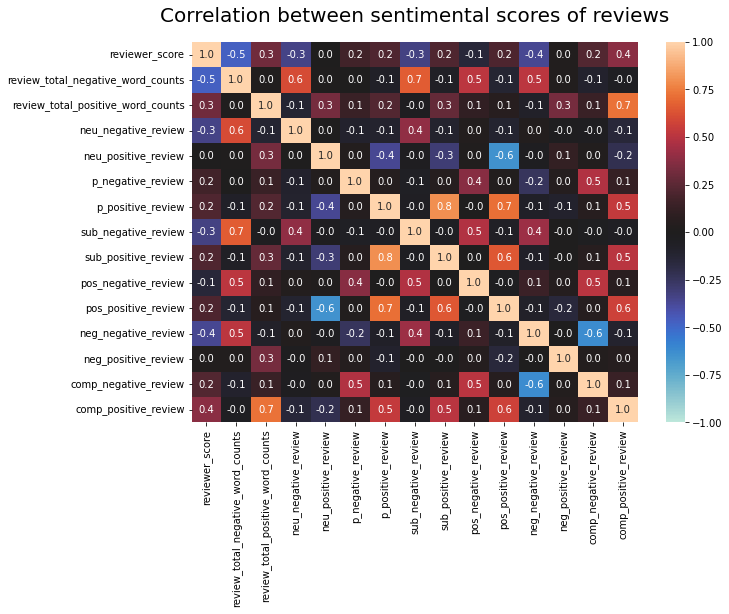

CPU times: user 26min 27s, sys: 890 ms, total: 26min 28s
Wall time: 26min 30s


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,neg_negative_review,neg_positive_review,comp_negative_review,comp_positive_review,neu_negative_review,neu_positive_review,p_negative_review,p_positive_review,sub_negative_review,sub_positive_review
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,0.129,0.0,-0.0554,0.9615,0.747,0.671,-0.05,0.461364,0.35,0.643939


In [53]:
%%time

# creating positive score by using sentiment intensity analyzer from nltk
data["pos_negative_review"] = data['negative_review'].apply(
                                lambda x: sia.polarity_scores(x)['pos'])
data["pos_positive_review"] = data['positive_review'].apply(
                                lambda x: sia.polarity_scores(x)['pos'])
# creating negative score by using sentiment intensity analyzer from nltk
data["neg_negative_review"] = data['negative_review'].apply(
                                lambda x: sia.polarity_scores(x)['neg'])
data["neg_positive_review"] = data['positive_review'].apply(
                                lambda x: sia.polarity_scores(x)['neg'])
# creating compound score by using sentiment intensity analyzer from nltk
data["comp_negative_review"] = data['negative_review'].apply(
                                lambda x: sia.polarity_scores(x)['compound'])
data["comp_positive_review"] = data['positive_review'].apply(
                                lambda x: sia.polarity_scores(x)['compound'])
# creating neutral score by using sentiment intensity analyzer from nltk
data["neu_negative_review"] = data['negative_review'].apply(
                                lambda x: sia.polarity_scores(x)['neu'])
data["neu_positive_review"] = data['positive_review'].apply(
                                lambda x: sia.polarity_scores(x)['neu'])
# creating polarity score by using texblob sentiment analysis
data["p_negative_review"] = data['negative_review'].apply(
                                lambda x: TextBlob(x).sentiment.polarity)
data["p_positive_review"] = data['positive_review'].apply(
                                lambda x: TextBlob(x).sentiment.polarity)
# creating subjectivity score by using texblob sentiment analysis
data["sub_negative_review"] = data['negative_review'].apply(
                                lambda x: TextBlob(x).sentiment.subjectivity)
data["sub_positive_review"] = data['positive_review'].apply(
                                lambda x: TextBlob(x).sentiment.subjectivity)

# creating dataset with new created columns with sentimental scores
data_review_scores = data[mask][["reviewer_score",                
                                "review_total_negative_word_counts", 
                                "review_total_positive_word_counts",
                                "neu_negative_review", "neu_positive_review", 
                                "p_negative_review", "p_positive_review",
                                "sub_negative_review", "sub_positive_review", 
                                'pos_negative_review', 'pos_positive_review',
                                'neg_negative_review', 'neg_positive_review',
                                'comp_negative_review', 'comp_positive_review']]
# creating heatmap for visualization correlation between this columns 
plt.rcParams['figure.figsize'] = (10,7)
heatmap_scores = sns.heatmap(data_review_scores.corr(method = 'spearman'), 
                     annot = True, vmin=-1, vmax=1, center= 0, fmt='.1f')
heatmap_scores.axes.set_title("Correlation between sentimental scores of reviews",
                              fontsize=20, pad=20)
plt.show()
data.head(1)

# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;"> 3. Encoding</p> 

In [54]:
# copying dataset for repeatable
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512372 entries, 0 to 515430
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               512372 non-null  object        
 1   additional_number_of_scoring                512372 non-null  int64         
 2   review_date                                 512372 non-null  datetime64[ns]
 3   average_score                               512372 non-null  float64       
 4   hotel_name                                  512372 non-null  object        
 5   reviewer_nationality                        512372 non-null  object        
 6   negative_review                             512372 non-null  object        
 7   review_total_negative_word_counts           512372 non-null  int64         
 8   total_number_of_reviews                     512372 non-null  int64        

In [55]:
# encoding new created temporal columns
df['review_period'] = df['review_period'].astype("category")
df_period = target_encoder.fit_transform(df['review_period'],df['reviewer_score'])
df = df_period.join(df.drop('review_period',axis = 1))


# encoding new created columns from "tags"
# creating function that encode 'type_of_room' like ordinal
def encoding_type_of_room(type_of_room):
    """This function encode the 'type_of_room' column like ordinal"""
    ordered_types_list = list(ordered_types.index)
    for index, value in enumerate(ordered_types_list):
        if type_of_room == value:
            return index
        
df['encoded_type_of_room'] = df["type_of_room"].apply(encoding_type_of_room)

df['type_of_trip']= label_encoder.fit_transform(df['type_of_trip'])

df['type_of_guests'] = df['type_of_guests'].astype("category")
df_guests = target_encoder.fit_transform(df['type_of_guests'],df['reviewer_score'])
df = df_guests.join(df.drop('type_of_guests',axis = 1))

df['count_nights'] = df['count_nights'].astype("category")
df_nights = target_encoder.fit_transform(df['count_nights'],df['reviewer_score'])
df = df_nights.join(df.drop('count_nights',axis = 1))


# encoding new created column from "hotel_address" 
df['hotel_city'] = df['hotel_city'].astype("category")
df_city=target_encoder.fit_transform(df['hotel_city'],df['reviewer_score'])
df = df_city.join(df.drop('hotel_city',axis = 1))


# encoding 'hotel_name' 
df['hotel_name'] = df['hotel_name'].astype("category")
df_hotel=target_encoder.fit_transform(df['hotel_name'],df['reviewer_score'])
df = df_hotel.join(df.drop('hotel_name',axis = 1))


# encoding 'reviewer_nationality' 
df['reviewer_nationality'] = df['reviewer_nationality'].astype("category")
df_nationality=target_encoder.fit_transform(df['reviewer_nationality'],df['reviewer_score'])
df = df_nationality.join(df.drop('reviewer_nationality',axis = 1))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512372 entries, 0 to 515430
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   reviewer_nationality                        512372 non-null  float64       
 1   hotel_name                                  512372 non-null  float64       
 2   hotel_city                                  512372 non-null  float64       
 3   count_nights                                512372 non-null  float64       
 4   type_of_guests                              512372 non-null  float64       
 5   review_period                               512372 non-null  float64       
 6   hotel_address                               512372 non-null  object        
 7   additional_number_of_scoring                512372 non-null  int64         
 8   review_date                                 512372 non-null  datetime64[ns

# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;"> 4. Feature assessment and selection</p> 

<h2>4.1. Preparing dataset for assessment  </h2>

<AxesSubplot:>

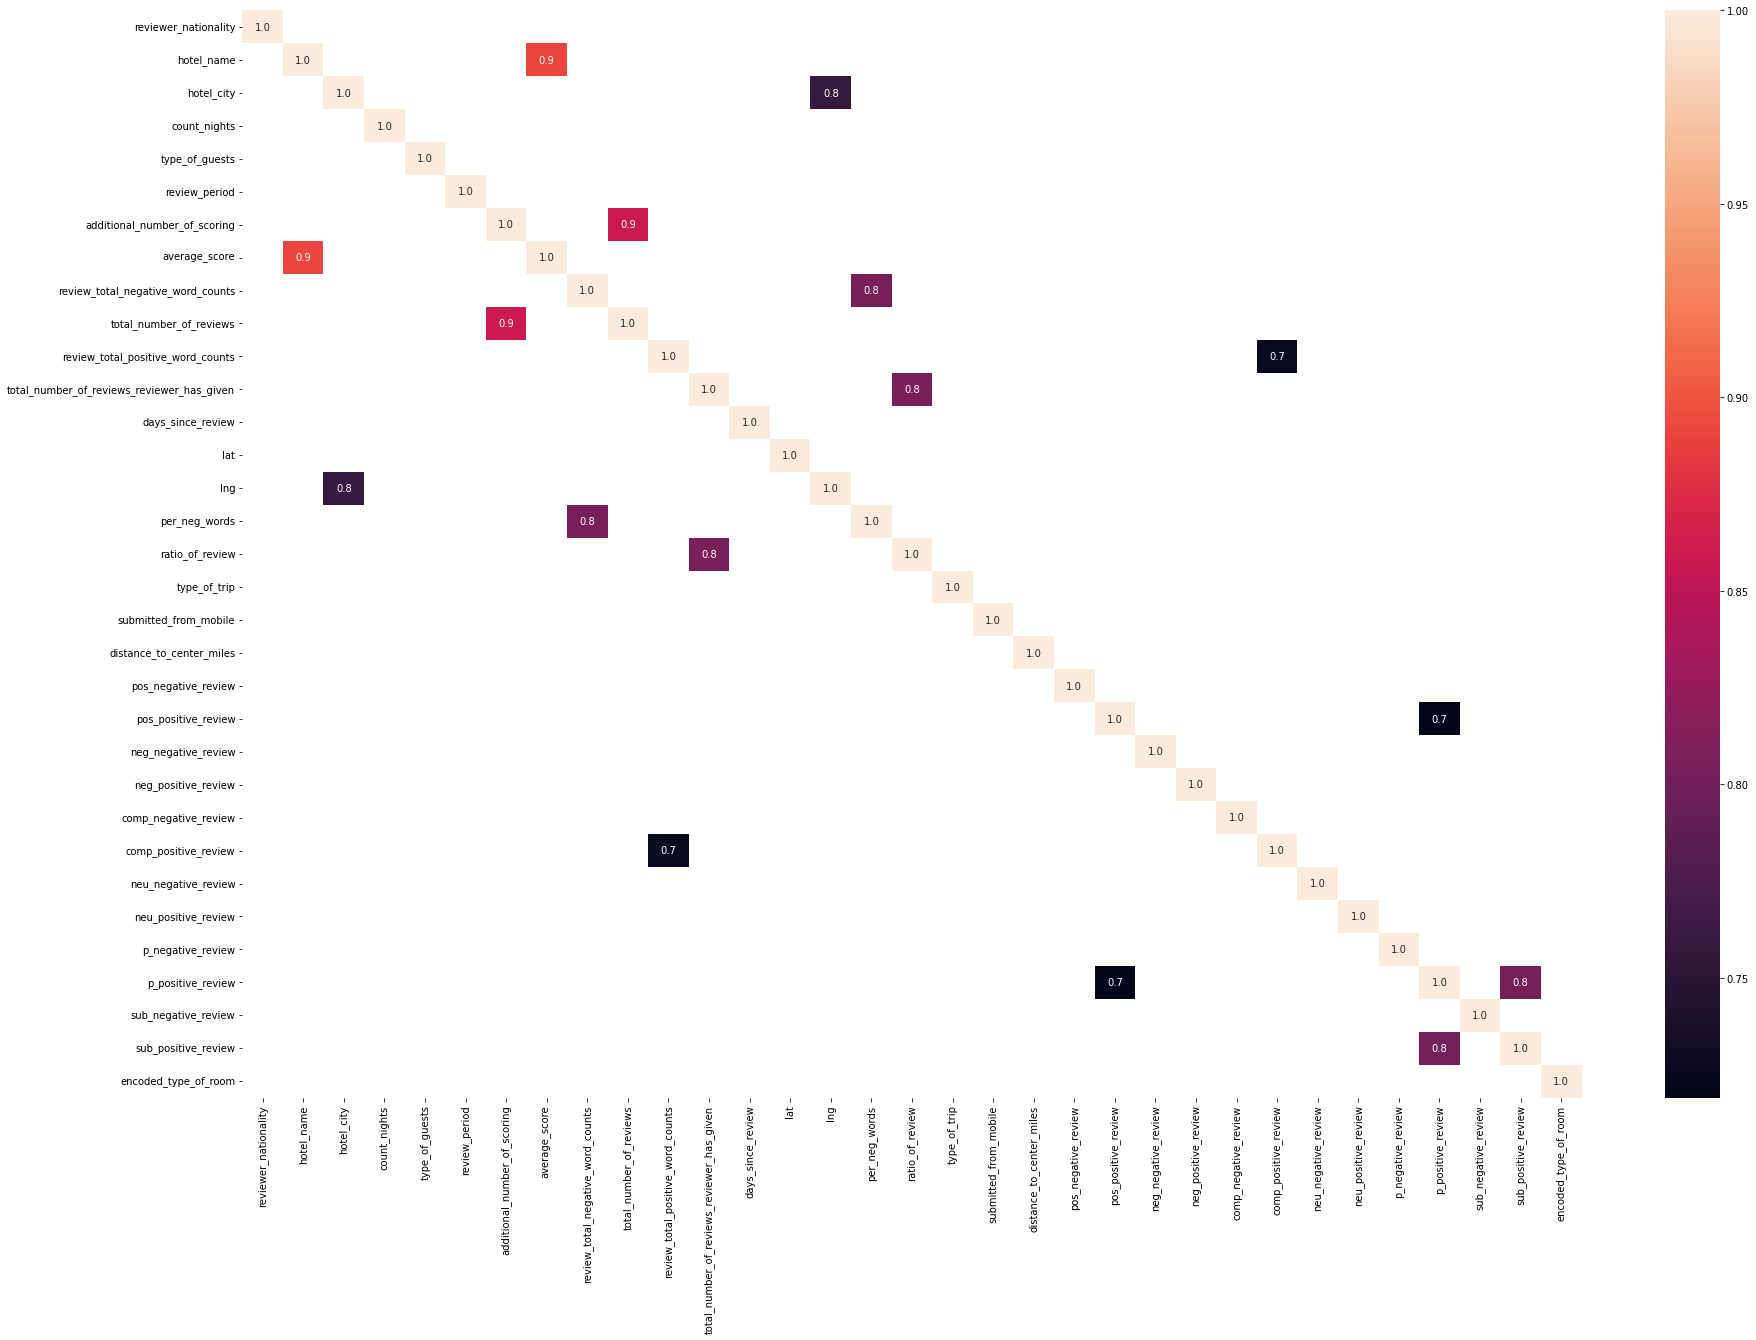

In [56]:
# creating correlation heatmap by using spearman method 
corr_df = df.drop(['sample', 'reviewer_score'], axis=1).corr(method='spearman')
plt.rcParams['figure.figsize'] = (30,20)
sns.heatmap(corr_df[corr_df.abs() > 0.7], annot = True,  fmt='.1f')

In [57]:
# creating list of columns that necessery to delete
object_cols = [s for s in df.columns 
                 if (df[s].dtypes == 'object') 
                 or (df[s].dtypes == 'datetime64[ns]')
                 or (df[s].dtypes == 'category')]
# deleting object columns
df.drop(object_cols, axis = 1, inplace=True)
# deleting unnecessery numerical columns
df.drop(["lat", "lng"], axis = 1, inplace=True)
# showing list of left columns 
list(df.columns)

['reviewer_nationality',
 'hotel_name',
 'hotel_city',
 'count_nights',
 'type_of_guests',
 'review_period',
 'additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'days_since_review',
 'sample',
 'reviewer_score',
 'per_neg_words',
 'ratio_of_review',
 'type_of_trip',
 'submitted_from_mobile',
 'distance_to_center_miles',
 'pos_negative_review',
 'pos_positive_review',
 'neg_negative_review',
 'neg_positive_review',
 'comp_negative_review',
 'comp_positive_review',
 'neu_negative_review',
 'neu_positive_review',
 'p_negative_review',
 'p_positive_review',
 'sub_negative_review',
 'sub_positive_review',
 'encoded_type_of_room']

In [63]:
# dividing this columns into categorical and numerical

cat_cols = ['average_score', 'hotel_name',
            'type_of_trip',  'type_of_guests',  
            'count_nights', 'submitted_from_mobile',
            'hotel_city', 'reviewer_nationality',
            'review_period', 'encoded_type_of_room'
            ] 
 
num_cols = ['additional_number_of_scoring', 
            'total_number_of_reviews', 
            'review_total_negative_word_counts',
            'review_total_positive_word_counts', 
            'total_number_of_reviews_reviewer_has_given',
            
            'days_since_review',
            'distance_to_center_miles',
            
            'neu_negative_review', 'neu_positive_review',
            'p_negative_review', 'p_positive_review',
            'sub_negative_review', 'sub_positive_review',
            'pos_negative_review', 'pos_positive_review',
            'neg_negative_review', 'neg_positive_review',
            'comp_negative_review', 'comp_positive_review',
            
            'per_neg_words', 'ratio_of_review'
           ]

In [59]:
# breaking dataset to assess the significance of features
# Х — data with hotel info, у — target variable (reviewer score) 
X = df[df['sample']==1].drop(['reviewer_score'], axis = 1)  
y = df[df['sample']==1]['reviewer_score'] 
y = y.astype('int')

<h2>4.2. Assessment of numerical variables </h2>

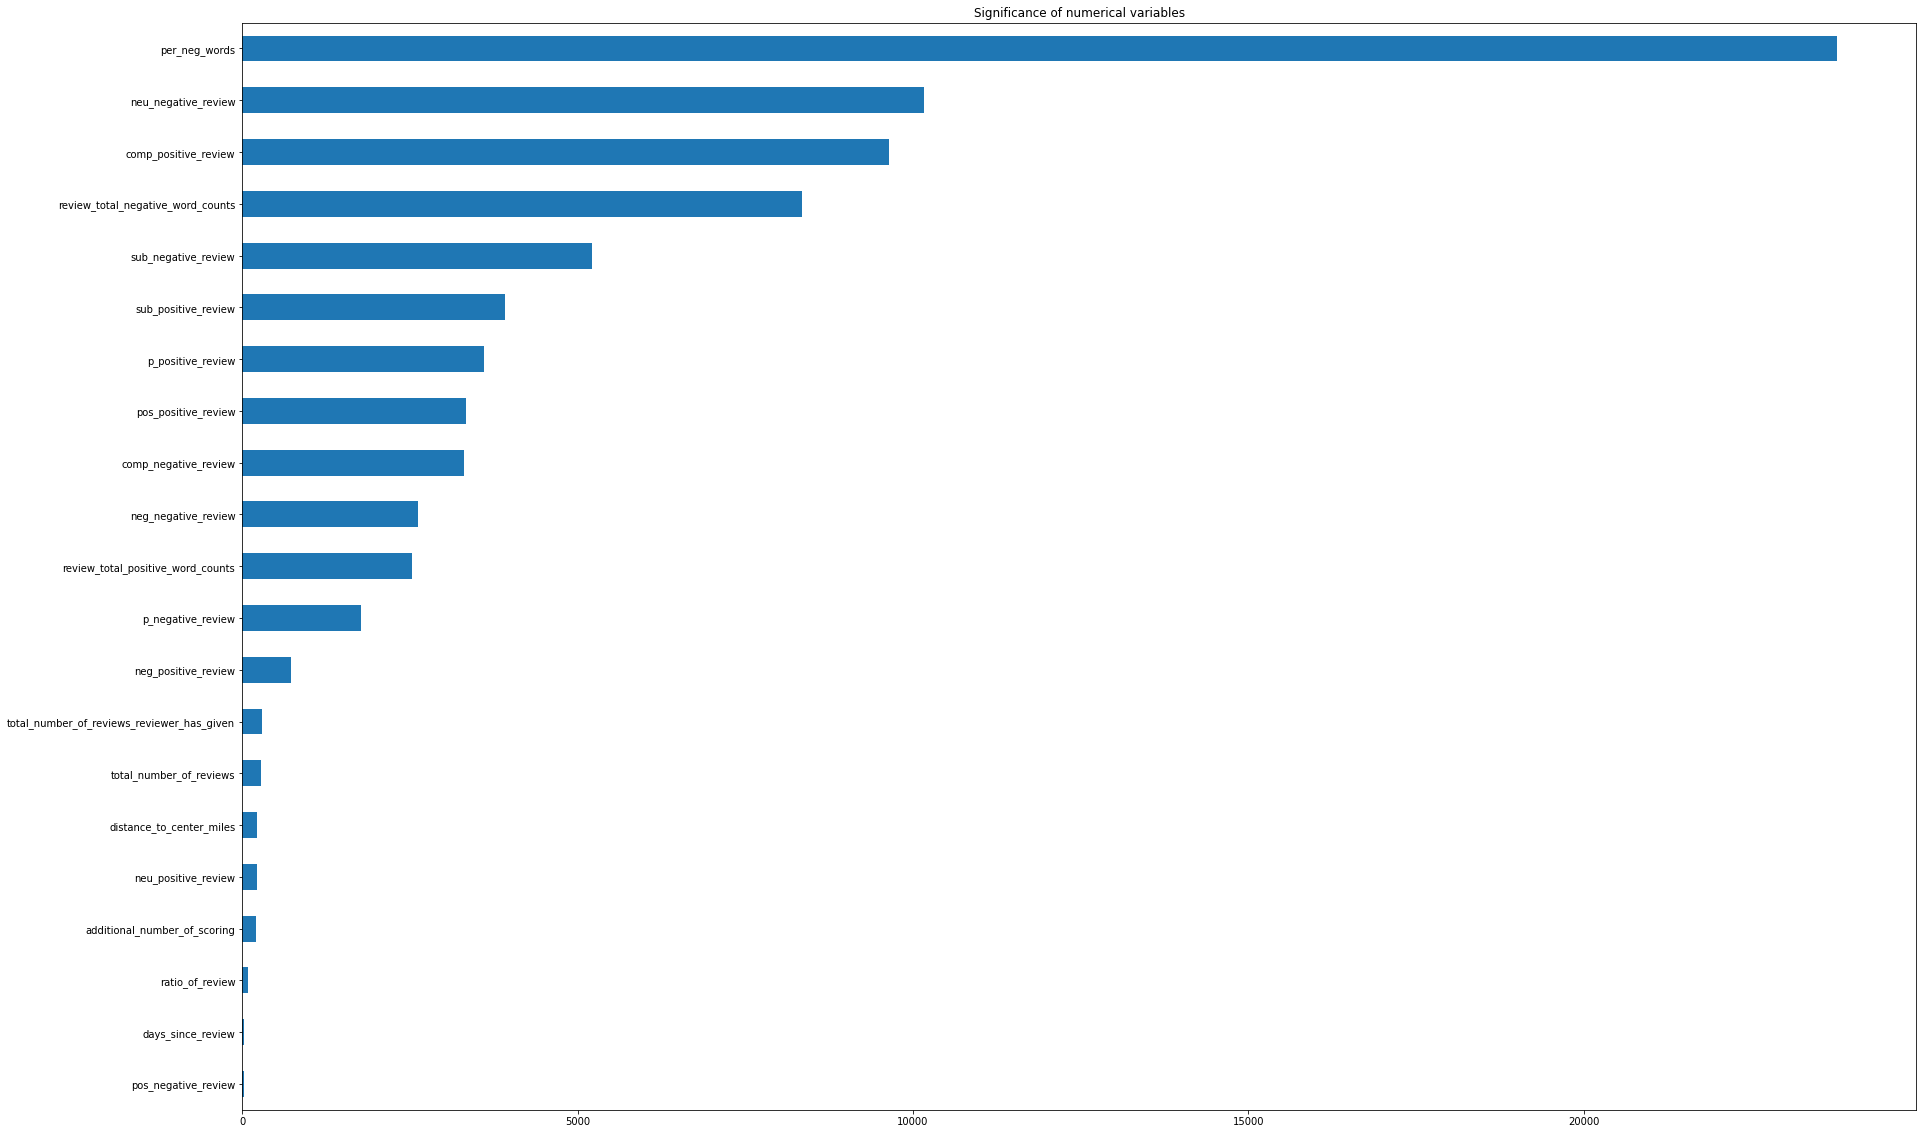

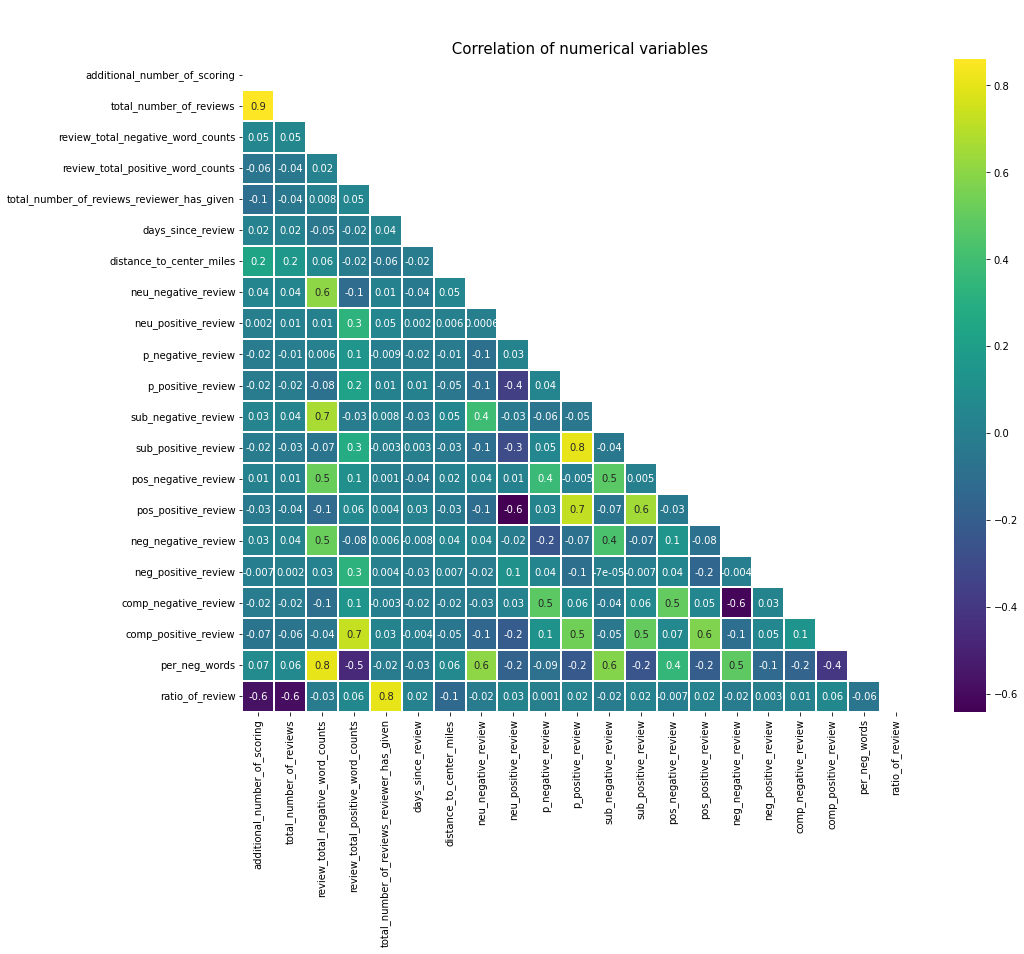

In [60]:
# to assess the significance of numerical variables 
# we will use the function f_classif
imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
# plotting barh graph
imp_num.plot(kind = 'barh', title="Significance of numerical variables")

# plotting heatmap correlation diagram of numerical features
fig, ax = plt.subplots(figsize=(15, 12))
corr_num = df[num_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr_num, dtype=bool))
sns.heatmap(corr_num, 
            annot=True, 
            linewidths=0.1, 
            ax=ax, 
            mask=mask, 
            cmap='viridis',
            fmt='.1g')
ax.set_title('\n \n Correlation of numerical variables', fontsize=15)
plt.show()

In [61]:
drop_nums = ['additional_number_of_scoring', "days_since_review"]
df.drop(drop_nums, axis = 1, inplace=True)

<h2>4.2. Assessment of categorical variables </h2>

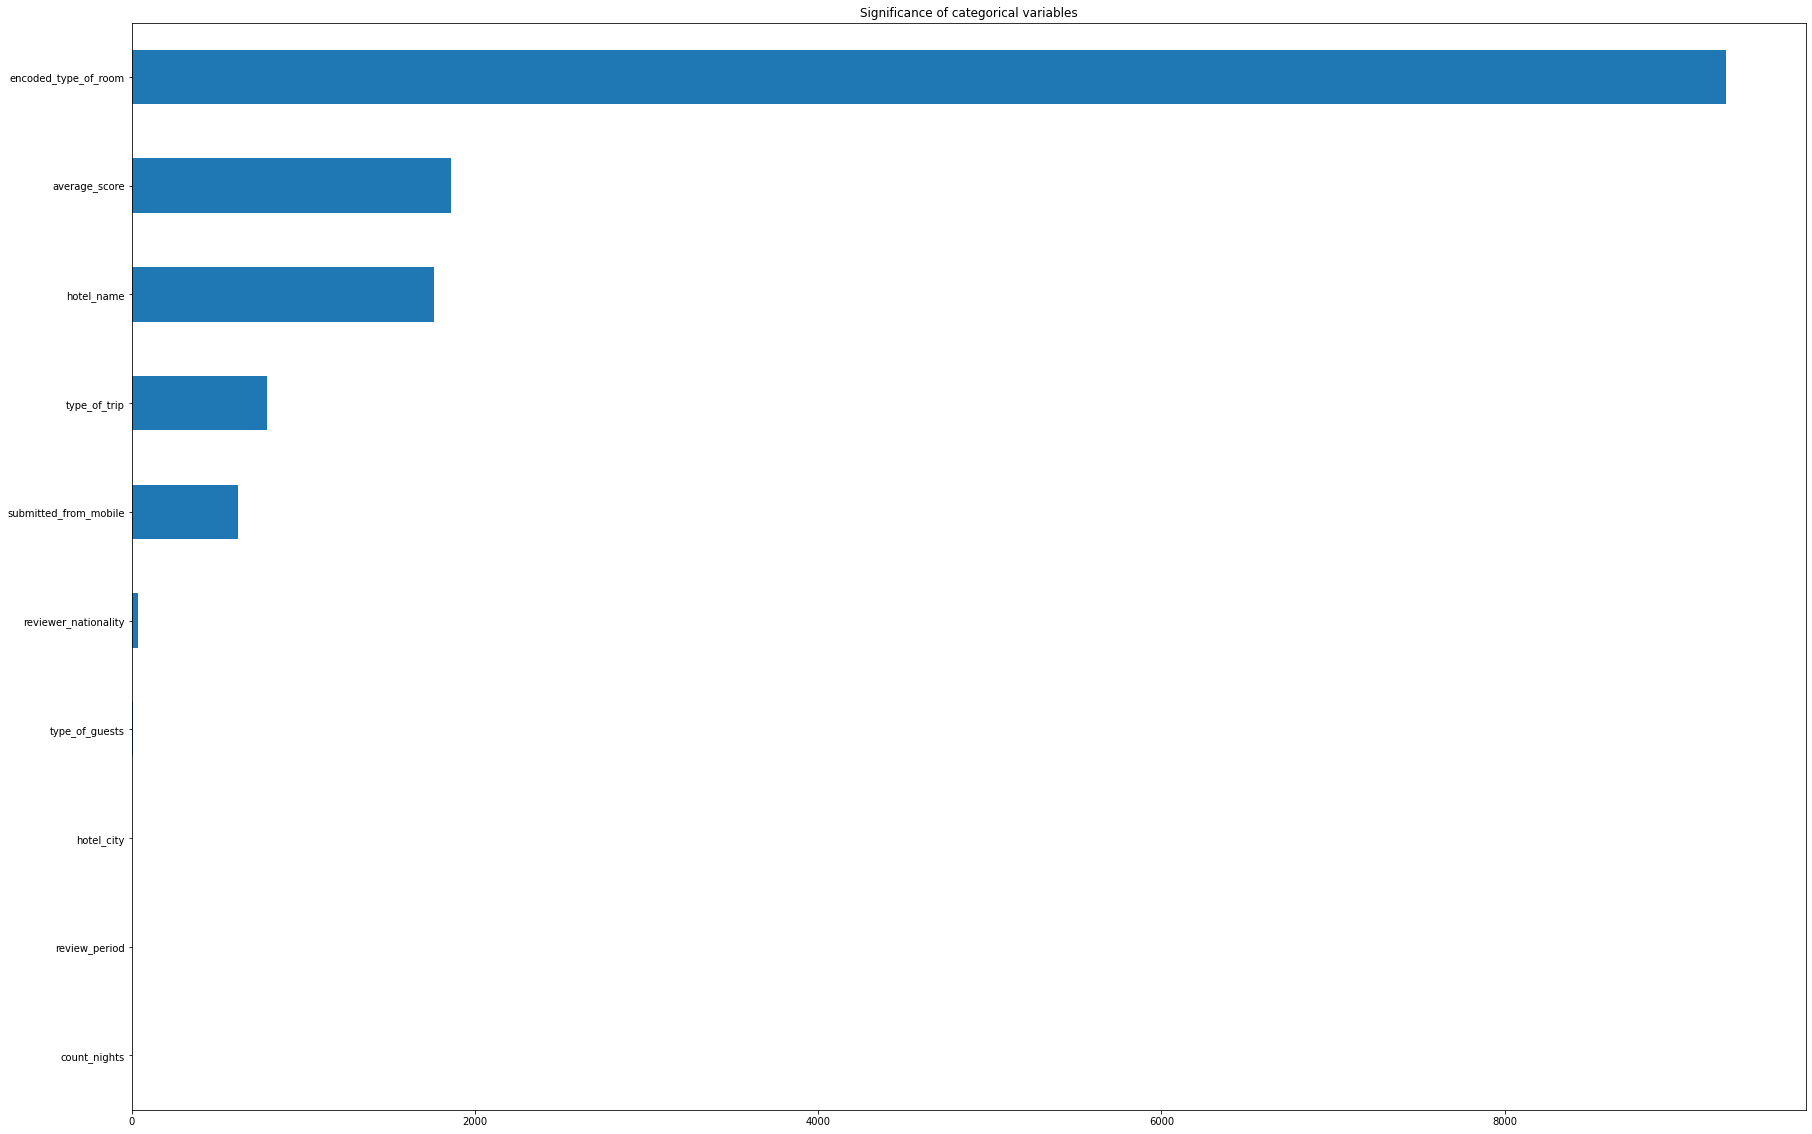

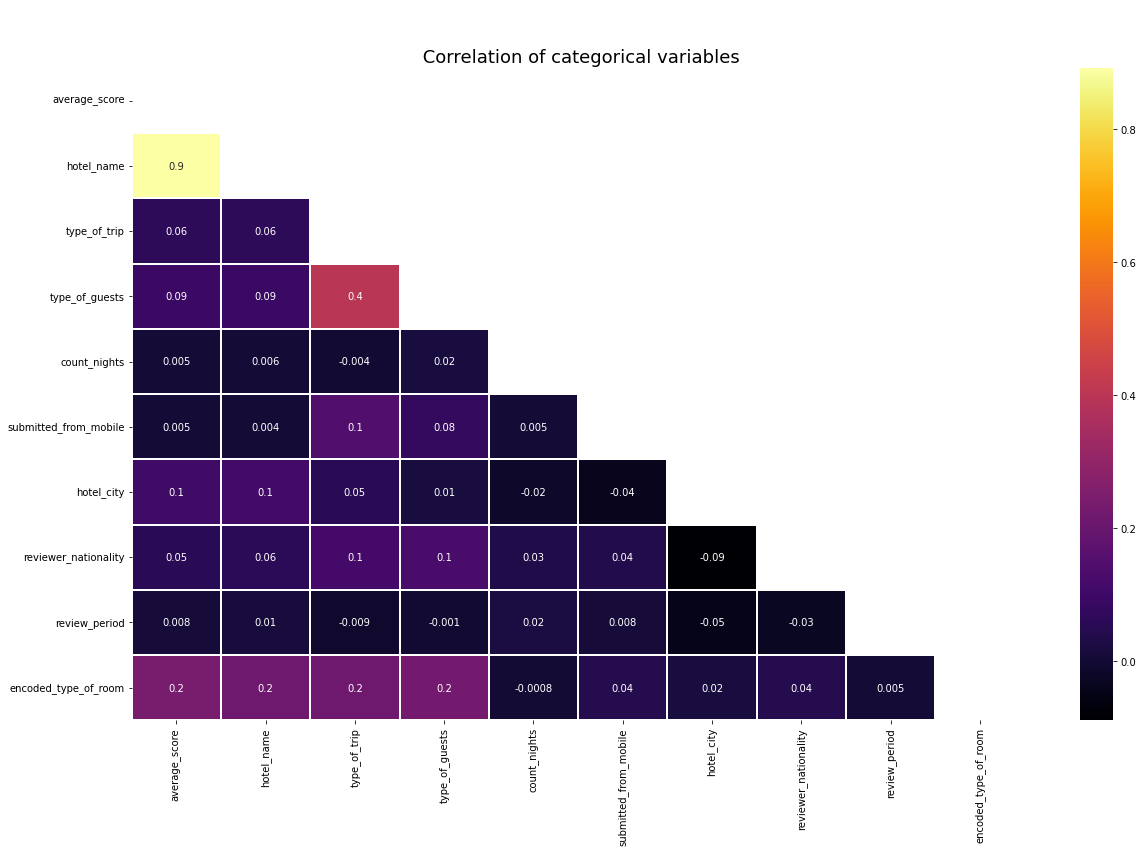

In [64]:
# to assess the significance of categorical variables 
# we will use the function chi2
imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
# plotting barh graph
imp_cat.plot(kind = 'barh', title="Significance of categorical variables")

# plotting heatmap correlation diagram of categorical features
fig, ax = plt.subplots(figsize=(20, 12))
corr_cat = df[cat_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr_cat, dtype=bool))
sns.heatmap(corr_cat, 
            annot=True, 
            linewidths=0.1, 
            ax=ax, 
            mask=mask, 
            cmap='inferno',
            fmt='.1g')
ax.set_title('\n \n Correlation of categorical variables', fontsize=18)
plt.show() 

In [65]:
drop_cats = ['average_score']
df.drop(drop_cats, axis = 1, inplace=True)

# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;"> 5.  Machine Learning </p> 

In [66]:
# dividing dataset into train and test 
train_df = df.query('sample == 1').drop(['sample'], axis=1)
test_df = df.query('sample == 0').drop(['sample'], axis=1)

y = train_df.reviewer_score.values # target value          
X = train_df.drop(['reviewer_score'], axis=1)

In [67]:
%%capture
!pip install lightautoml

# QUICK WORKAROUND FOR PROBLEM WITH PANDAS
!pip install -U pandas

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

# setting constants for lightautoml
N_THREADS = 10
N_FOLDS = 10
RANDOM_STATE = 42
TEST_SIZE = 0.3
TIMEOUT = 5000 
TARGET_NAME = 'reviewer_score'

# for reproducibility
np.random.seed(RANDOM_STATE)

In [68]:
# dividing for train и validation data

tr_data, te_data = train_test_split(
    train_df, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

In [69]:
# Task - object from lightautoml
# setting what kind task we are solving: 
# 'binary', regression - 'reg', 'multiclass'
# in this case it is regression 
# because we predict the real number 

task = Task('reg', loss = 'mae', metric = 'mae')

# setting target column
roles = {
    'target': TARGET_NAME,
    'drop': []
}

# creating object TabularAutoML

automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
)



# starting machine learning 
# after we will get Out OF Folde prediction

oof_pred = automl.fit_predict(tr_data, roles = roles, verbose = 1)


[01:30:05] Stdout logging level is INFO.
[01:30:05] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[01:30:05] Task: reg

[01:30:05] Start automl preset with listed constraints:
[01:30:05] - time: 5000.00 seconds
[01:30:05] - CPU: 10 cores
[01:30:05] - memory: 16 GB

[01:30:05] Train data shape: (268405, 29)

[01:30:12] Layer 1 train process start. Time left 4992.58 secs
[01:30:34] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[01:30:48] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.8846714008238423
[01:30:48] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[01:30:48] Time left 4956.83 secs

[01:31:19] Selector_LightGBM fitting and predicting completed
[01:31:41] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[01:37:49] Time limit exceeded after calculating fold 5

[01:37:49] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.8150020895842502
[01:37:49] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting com

CPU times: user 223 ms, sys: 125 ms, total: 348 ms
Wall time: 143 ms


<AxesSubplot:xlabel='Feature'>

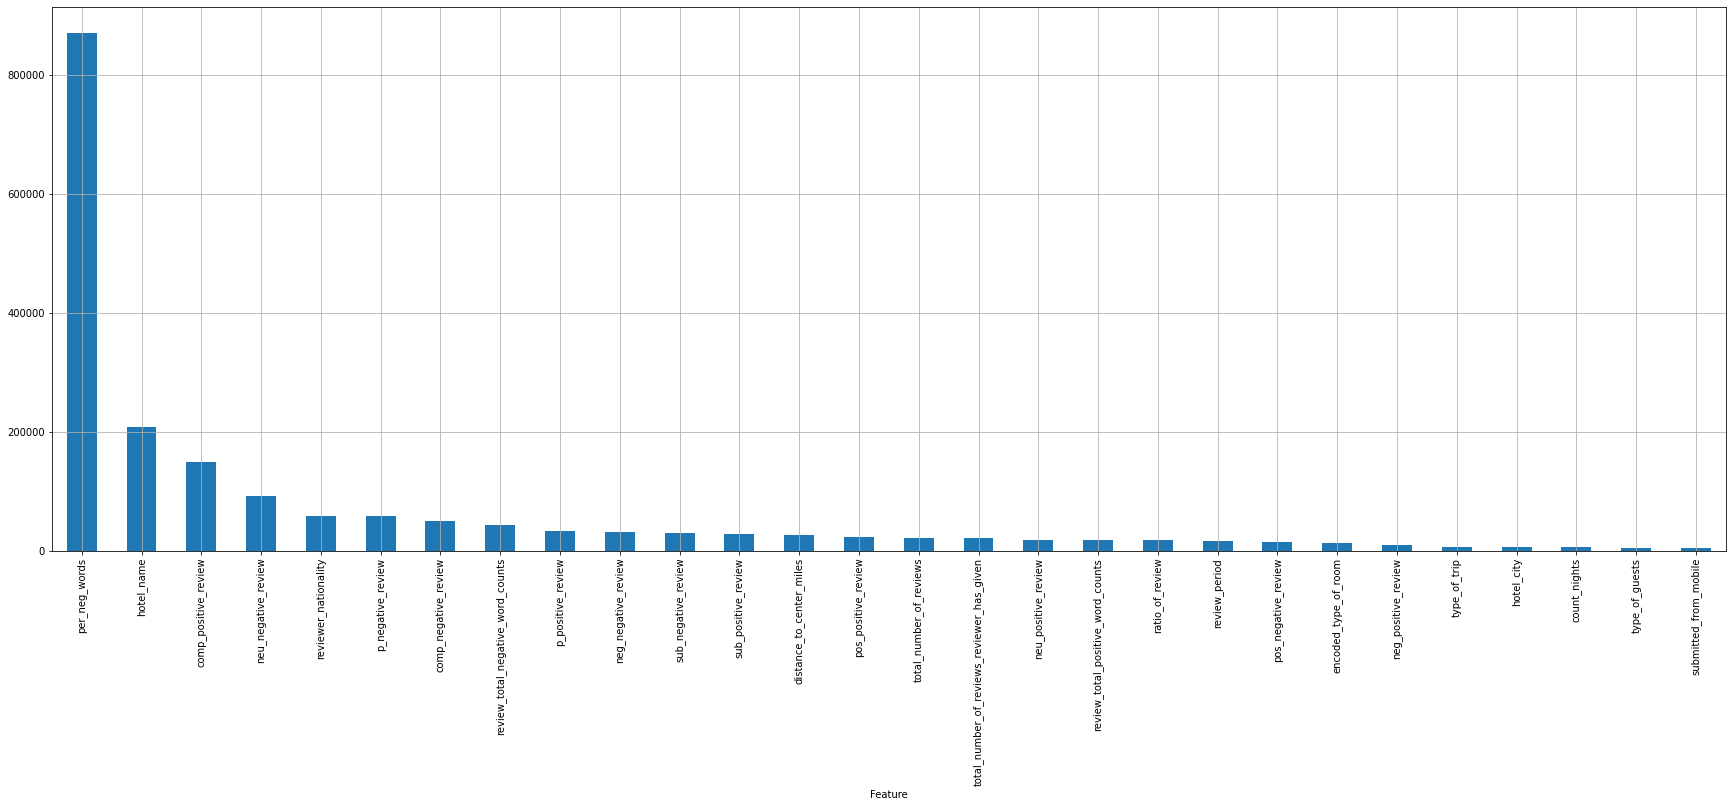

In [70]:
%%time
# assess the most important features 
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [71]:
# getting prediction by validation data using automl.predict function
te_pred = automl.predict(te_data)
print(f'Prediction for te_data:\n{te_pred}\nShape = {te_pred.shape}')

Prediction for te_data:
array([[7.511717 ],
       [9.048017 ],
       [7.2757754],
       ...,
       [9.4989195],
       [9.667786 ],
       [8.690645 ]], dtype=float32)
Shape = (115032, 1)


In [72]:
# Mean Absolute Percentage Error (MAPE) metric shows the average deviation 
# of the predicted values from the actual values
print('MAPE:', metrics.mean_absolute_percentage_error(te_data[TARGET_NAME].values, te_pred.data[:, 0]))

MAPE: 0.11768852594979178


In [73]:
# getting the target variable is predicted
test_pred = automl.predict(test_df)
print(f'Prediction for te_data:\n{test_pred}\nShape = {test_pred.shape}')

Prediction for te_data:
array([[8.857569 ],
       [8.265659 ],
       [8.471837 ],
       ...,
       [8.217527 ],
       [9.724042 ],
       [7.6127157]], dtype=float32)
Shape = (128935, 1)


In [76]:
sample_submission[TARGET_NAME] = test_pred.data[:, 0]
sample_submission.to_csv('submission.csv', index = False)